In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Importing Data

In [2]:
psr2020 = pd.read_csv("pet_store_records_2020.csv")


In [3]:
psr2020

product_id product_category  sales  price  VAP vendor_id    country  \
0          5040        Equipment    123   7293    0   VC_1605    Vietnam   
1          4567             Toys     61   9304    1   VC_1132      India   
2          4237             Toys    218   8180    0    VC_802      India   
3          4364            Snack     69  18559    1    VC_929      India   
4          4184      Supplements    138  10283    1    VC_749      India   
..          ...              ...    ...    ...  ...       ...        ...   
874        4999            Snack     27  11302    1   VC_1564    Germany   
875        4243            Snack     76  13390    0    VC_808      India   
876        4783            Snack    162  17240    1   VC_1348        USA   
877        4664          Bedding     34  15319    1   VC_1229      India   
878        4850             Toys     54  13219    0   VC_1415  Singapore   

    pet_size pet_type  rating  re_buy  
0      small     fish       7       1  
1      small      cat      10       0  
2      small  hamster       6       0  
3      large      dog       1       1  
4      large      dog      10       0  
..       ...      ...     ...     ...  
874   medium     bird       6       0  
875   medium  hamster       8       0  
876   medium      cat       7       1  
877    large      dog      10       1  
878    small      dog       1       1  

[879 rows x 11 columns]

In [4]:
psr2020['product_id'].value_counts()

5040    1
4501    1
4246    1
4368    1
4566    1
       ..
4677    1
4276    1
4745    1
4278    1
4850    1
Name: product_id, Length: 879, dtype: int64

# Data Wrangling

# Recoding categorical variable into numbers

### PRODUCT CATEGORY recoded into integers

### Applying the recoded variable to the dataset

# IDENTIFYING THE RECODE COLUMN

In [5]:
psr2020.columns

Index(['product_id', 'product_category', 'sales', 'price', 'VAP', 'vendor_id',
       'country', 'pet_size', 'pet_type', 'rating', 're_buy'],
      dtype='object')

# Sort Pet type alphabetically & Filtering Pet type == dog

In [6]:
psr2020_dog = psr2020[psr2020['pet_type']=='dog'].reset_index()

In [7]:
psr2020_dog.head()

index  product_id product_category  sales  price  VAP vendor_id country  \
0      3        4364            Snack     69  18559    1    VC_929   India   
1      4        4184      Supplements    138  10283    1    VC_749   India   
2      6        4380             Toys     79  13519    1    VC_945   India   
3      9        4238         Medicine    141  19082    1    VC_803   India   
4     10        4650            Snack    185  14479    1   VC_1215   India   

      pet_size pet_type  rating  re_buy  
0        large      dog       1       1  
1        large      dog      10       0  
2  extra_small      dog       8       0  
3       medium      dog      10       1  
4  extra_small      dog      10       1

# Sorting pet size (descending order)

In [8]:
psr2020_size = psr2020_dog.sort_values(by=['pet_size'],ascending = False).reset_index()

In [9]:
psr2020_size

level_0  index  product_id product_category  sales  price  VAP vendor_id  \
0        173    438        4362        Accessory    229  12961    1    VC_927   
1        202    513        4836        Equipment    217  18681    1   VC_1401   
2        180    455        4662        Equipment    148  12373    0   VC_1227   
3        181    465        4864            Snack     83  12594    0   VC_1429   
4        184    472        4770        Equipment     92   1923    0   VC_1335   
..       ...    ...         ...              ...    ...    ...  ...       ...   
342      211    540        4326         Medicine      5  15682    0    VC_891   
343       24     66        4426      Supplements    228  18570    1    VC_991   
344      304    775        4436         Medicine     71   5946    1   VC_1001   
345       20     51        4476          Clothes    188   5849    0   VC_1041   
346       87    235        4516        Accessory     16   7495    1   VC_1081   

       country     pet_size pet_type  rating  re_buy  
0        India        small      dog       2       1  
1       Turkey        small      dog       2       1  
2        India        small      dog      10       1  
3      Germany        small      dog       6       1  
4    Singapore        small      dog       7       1  
..         ...          ...      ...     ...     ...  
342      India  extra_large      dog       3       1  
343      India  extra_large      dog       8       0  
344      India  extra_large      dog       6       1  
345      India  extra_large      dog       9       1  
346      India  extra_large      dog       6       0  

[347 rows x 13 columns]

# Dropping irrelavent columns

In [10]:
psr2020_size = psr2020_size.drop(['vendor_id','VAP',"level_0", "index"], axis=1)

In [11]:
psr2020_size

product_id product_category  sales  price    country     pet_size  \
0          4362        Accessory    229  12961      India        small   
1          4836        Equipment    217  18681     Turkey        small   
2          4662        Equipment    148  12373      India        small   
3          4864            Snack     83  12594    Germany        small   
4          4770        Equipment     92   1923  Singapore        small   
..          ...              ...    ...    ...        ...          ...   
342        4326         Medicine      5  15682      India  extra_large   
343        4426      Supplements    228  18570      India  extra_large   
344        4436         Medicine     71   5946      India  extra_large   
345        4476          Clothes    188   5849      India  extra_large   
346        4516        Accessory     16   7495      India  extra_large   

    pet_type  rating  re_buy  
0        dog       2       1  
1        dog       2       1  
2        dog      10       1  
3        dog       6       1  
4        dog       7       1  
..       ...     ...     ...  
342      dog       3       1  
343      dog       8       0  
344      dog       6       1  
345      dog       9       1  
346      dog       6       0  

[347 rows x 9 columns]

In [12]:
psr2020_size['revenue'] = psr2020_size['sales'] * psr2020_size['price'] 

In [13]:
psr2020_size['revenue'] 

0      2968069
1      4053777
2      1831204
3      1045302
4       176916
        ...   
342      78410
343    4233960
344     422166
345    1099612
346     119920
Name: revenue, Length: 347, dtype: int64

In [14]:
psr2020_size.to_csv("pet_size_clean.csv",index=False)


# Import packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox


# Testing for Linearity and Normality

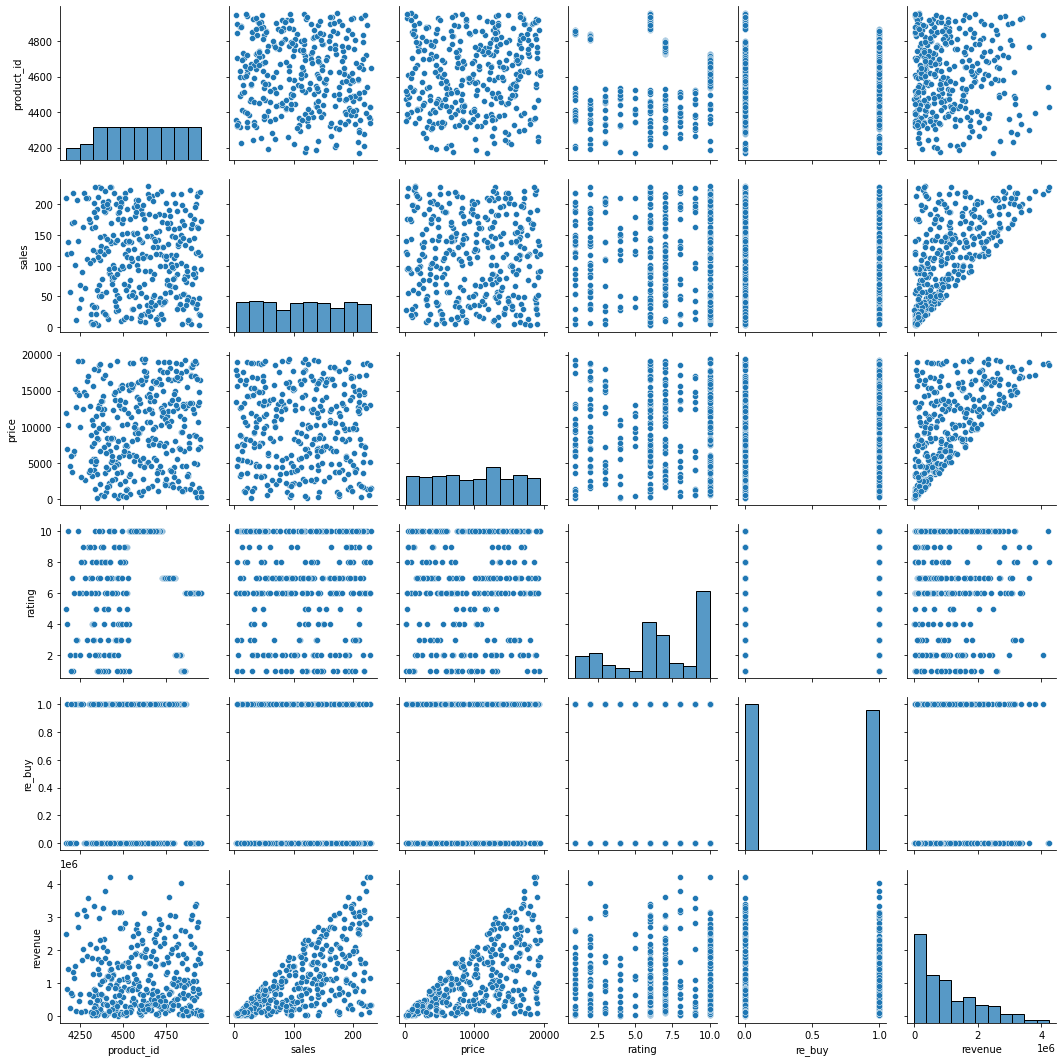

In [16]:
sns.pairplot(psr2020_size)

In [17]:
psr2020_size.groupby("rating")['re_buy'].sum()

rating
1     21
2     27
3      9
4      6
5      3
6     12
7     28
8      4
9      9
10    51
Name: re_buy, dtype: int64

In [18]:
psr2020_size.groupby("rating")[['sales','price']].mean()

sales         price
rating                          
1       125.076923   8119.000000
2       116.066667  10303.900000
3       123.800000   9989.933333
4       118.916667   6074.250000
5       126.375000   8955.250000
6        99.059701  10179.626866
7       115.711538   9753.750000
8       124.722222   9198.722222
9       138.214286   8050.000000
10      112.723810  10608.600000

This output shows the mean sales and price of products in different rating categories in the dataset psr2020_size. The ratings range from 1 to 10, and each rating category has an associated average sales and price. For example, products with a rating of 1 have an average sales of 125.08 and an average price of 8119.00, while products with a rating of 10 have an average sales of 112.72 and an average price of 10608.60.

<AxesSubplot: >

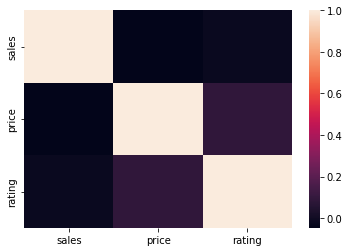

In [19]:
sns.heatmap(psr2020_size[["sales",'price','rating']].corr())

### The linear regression algorithm assumes that there is a linear relationship between the parameters of independent variables on the x-axis and the dependent variable on the y-axis. If the true relationship is not linear, we cannot use the model as the accuracy will be significantly reduced. Thus, it becomes important to validate this assumption.

### In this model of plots I found that there is a slight relationship between price and rating. However there is no relationship between, price and sales, and rating and sales and cannot be used in further testing together due to reduced accuracy.

# Normal Distribution Curve for sales (Normality)

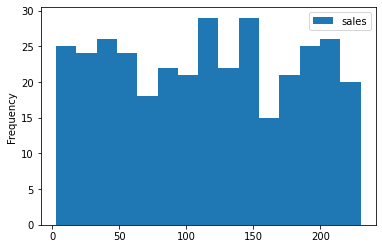

In [20]:
psr2020_size[['sales']].plot.hist(bins=15)
plt.show()

### This normality curve for sales is very dense and although it is not perfectly curved it has even distribution around the mean of the sales data

# Normal Distribution Curve for Ratings

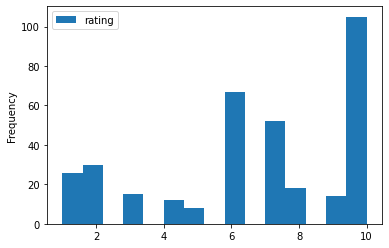

In [21]:
psr2020_size[['rating']].plot.hist(bins=15)
plt.show()

### The normality curve for rating is scattered and skewed right. This graph does not appear to be normally distributed.

# import packages

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

# Homoscedasticity

In [23]:
"""def product_category (series): 
    if series == "Equipment":
        return 0
    if series == "Toys": 
        return 1
    if series == "Bedding":
        return 2
    if series == "Food": 
        return 3
    if series == "Clothes":
        return 4
    if series == "Snack":
        return 5
    if series == "Housing": 
        return 6
    if series == "Supplements":
        return 7
    if series == "Grooming": 
        return 8
    if series == "Medicine":
        return 9
    if series == "Accessory": 
        return 10
psr2020_size['product_categoryR'] = psr2020_size['product_category'].apply(product_category)"""

'def product_category (series): \n    if series == "Equipment":\n        return 0\n    if series == "Toys": \n        return 1\n    if series == "Bedding":\n        return 2\n    if series == "Food": \n        return 3\n    if series == "Clothes":\n        return 4\n    if series == "Snack":\n        return 5\n    if series == "Housing": \n        return 6\n    if series == "Supplements":\n        return 7\n    if series == "Grooming": \n        return 8\n    if series == "Medicine":\n        return 9\n    if series == "Accessory": \n        return 10\npsr2020_size[\'product_categoryR\'] = psr2020_size[\'product_category\'].apply(product_category)'

In [24]:
psr2020_size_lr = pd.get_dummies(psr2020_size.drop(['pet_type'],axis=1))

In [25]:
x = psr2020_size_lr['sales']
y = psr2020_size['rating']

model = sm.OLS(y,x).fit()

# 'Rating' Regression Results

In [26]:
pred_val = model.fittedvalues.copy()
true_val = psr2020_size['rating'].values.copy()
residual = true_val - pred_val

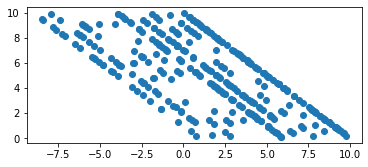

In [27]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

Homoscedasticity means the error is constant across the values of the dependent variable. The easiest way to check homoscedasticity is to make a scatterplot with the residuals against the dependent variable. If a model violates homoscedasticity, it will exhibit heteroscedasticity.

In this model we can assume heteroscedasticity within the independent variable.

# Breusch Pagan test

In [28]:
sms.diagnostic.het_breuschpagan(residual, psr2020_size[['sales']])


(56.4121028222561, nan, 67.16930665753665, 4.901977282011421e-15)

The output is from the het_breuschpagan test for heteroscedasticity. The first value, 56.4121028222561, is the test statistic. The second value, nan, is the p-value of the test statistic. The third value, 67.16930665753665, is the degrees of freedom of the test. The fourth value, 4.901977282011421e-15, is the probability value or p-value of the test.

Since the p-value is very small (4.901977282011421e-15), we can conclude that there is strong evidence of heteroscedasticity. In other words, the variance of the residuals is not constant across the range of values of the independent variable(s).


Simply,If the test statistic has a p-value below an appropriate threshold (e.g. p < 0.05) then the null hypothesis of homoskedasticity is rejected and heteroscedasticity assumed.

With the F value being higher, and a p value <.05 it results in being very statistically significant, which violates the assumption of homoscedasticity. Alternatively heteroscedasticity is assumed.

In [29]:
sms.linear_harvey_collier(model)

TtestResult(statistic=10.23875445230502, pvalue=1.2076568009000913e-21, df=343)

The output shows the result of a t-test performed on the residuals of a linear regression model using the Harvey-Collier test. The test is used to check for linearity of the relationship between the dependent variable and the independent variables in the model.

The output shows that the calculated t-statistic is 10.2387 and the corresponding p-value is 1.2077e-21, which is very small. This indicates strong evidence against the null hypothesis of linearity and suggests that the relationship between the dependent variable and independent variables is non-linear. The degrees of freedom for the test is 343.

In [30]:
transformed, _ = boxcox(psr2020_size['rating'])

# Is there Normal distribution here??

(array([ 56.,  15.,  12.,   0.,   8.,  67.,  52.,  18.,  14., 105.]),
 array([ 0.        ,  1.16005959,  2.32011919,  3.48017878,  4.64023838,
         5.80029797,  6.96035756,  8.12041716,  9.28047675, 10.44053635,
        11.60059594]),
 <BarContainer object of 10 artists>)

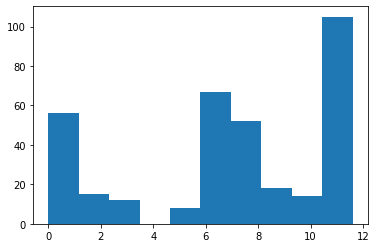

In [31]:
plt.hist(transformed)

This output is a histogram plot created using matplotlib library. The x-axis represents the range of values in the data and is divided into 10 bins. The y-axis represents the frequency of occurrence of the values in the data in each bin. The number of observations in each bin is shown by the height of the bars. In this case, there are 10 bins, and the data is skewed to the right, as the highest frequency of observations is in the last bin, and the bars decrease in height as they move towards the left.

In [32]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          4.594e+04
Date:                Sun, 26 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:12:05   Log-Likelihood:                         -331.99
No. Observations:                 347   AIC:                                      666.0
Df Residuals:                     346   BIC:                                      669.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8984      0.004    214.344      0.000       0.890       0.907
==============================================================================
Omnibus:                     6275.289   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.863
Skew:                          -0.155   Prob(JB):                     1.21e-07
Kurtosis:                       1.548   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code performs a simple linear regression analysis where the dependent variable is "rating" and the independent variable is "transformed." The summary table shows the results of the regression analysis, including measures of model fit (R-squared, adjusted R-squared), model quality (F-statistic and its associated p-value), and the coefficients for the independent variable (x1). The regression equation estimated is rating = 0.8984*transformed. The coefficient for the independent variable is statistically significant at the 0.05 level (p<0.05), indicating that there is a significant linear relationship between the transformed variable and the rating. The Omnibus and Jarque-Bera tests are used to test for normality and the null hypothesis is rejected which means that the residuals are not normally distributed.





### The overall model is statistically insignificant, because the pvalue is not < .05. Because the p value is not < .05, you can determine that the rating do not have a significant effect on the independent variables.

### Looking at the R-squared and Adj.R-squared in the upper right hand corner, you see that this model accounts for 99% of the variance in explaining the rating.

### The Omnibus does not indicate normality.
### The Prob(Omnibus)has normally distributed residuals being close to zero therefore is considered normally distributed.

### Durbin Watson test indicates Homoscedasticity
### Condition No. indicates low multicollinearity.

# 'Sales' Regression Plot Results

In [33]:
pred_val = model1.fittedvalues.copy()
true_val = psr2020_size['sales'].values.copy()
residual = true_val - pred_val

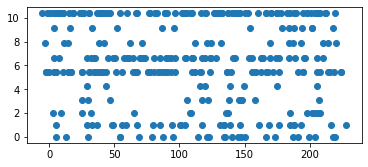

In [34]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

This model shows inconsistant relationships in the 6th, 7th and 11th frequency of sales on the y-axis. Athought there is a relationship between sales and other variables, we can conclude that the relationship is not linear.

# Testing for Multicollinearity

In [35]:
psr2020_size.corr()

/var/folders/_0/_7zjctvj7c5g8zt4g2czd7280000gn/T/ipykernel_32961/2584727111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  psr2020_size.corr()


product_id     sales     price    rating    re_buy   revenue
product_id    1.000000 -0.093241  0.099892  0.016322 -0.072570 -0.008355
sales        -0.093241  1.000000 -0.046237 -0.021608  0.012050  0.634778
price         0.099892 -0.046237  1.000000  0.084882  0.047249  0.640111
rating        0.016322 -0.021608  0.084882  1.000000 -0.187339  0.029257
re_buy       -0.072570  0.012050  0.047249 -0.187339  1.000000  0.051952
revenue      -0.008355  0.634778  0.640111  0.029257  0.051952  1.000000

The correlation coefficient between sales and price is negative (-0.046237), indicating a weak negative linear relationship between these two variables. This suggests that as the price of the product increases, the sales decrease slightly, although the relationship is not very strong.

Similarly, the correlation coefficient between sales and revenue is positive (0.634778), indicating a moderate positive linear relationship between these two variables. This suggests that as the sales of the product increase, the revenue also tends to increase.

It's worth noting that correlation does not imply causation and other factors may also be affecting the relationships between the variables.

# Correlations

/var/folders/_0/_7zjctvj7c5g8zt4g2czd7280000gn/T/ipykernel_32961/1585694249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(psr2020_size.corr(), annot=True)


<AxesSubplot: >

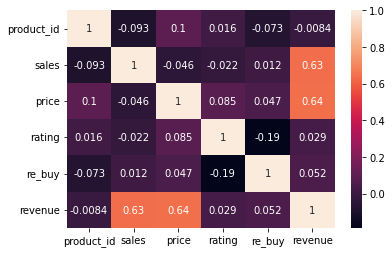

In [36]:
sns.heatmap(psr2020_size.corr(), annot=True)

### The color legend represents the levels of pvalue. We are looking for a pvalue < .05 to show significance. In this model it shows that there is significance between sales,price; sales,rating; sales,re_buy; price,re_buy; rating,re_buy; re_buy,product_categoryR; price,product_categoryR. There is Not significance between sales,product_categoryR; price,rating; rating,product_categoryR. 

# Identifying Outliers

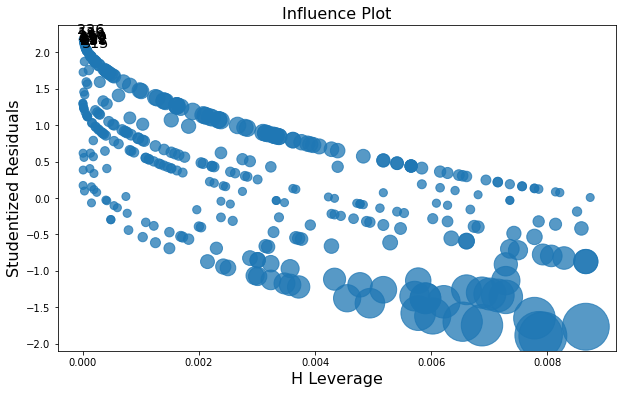

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(model, 
                                 alpha = .05, ax = ax, criterion="cooks")

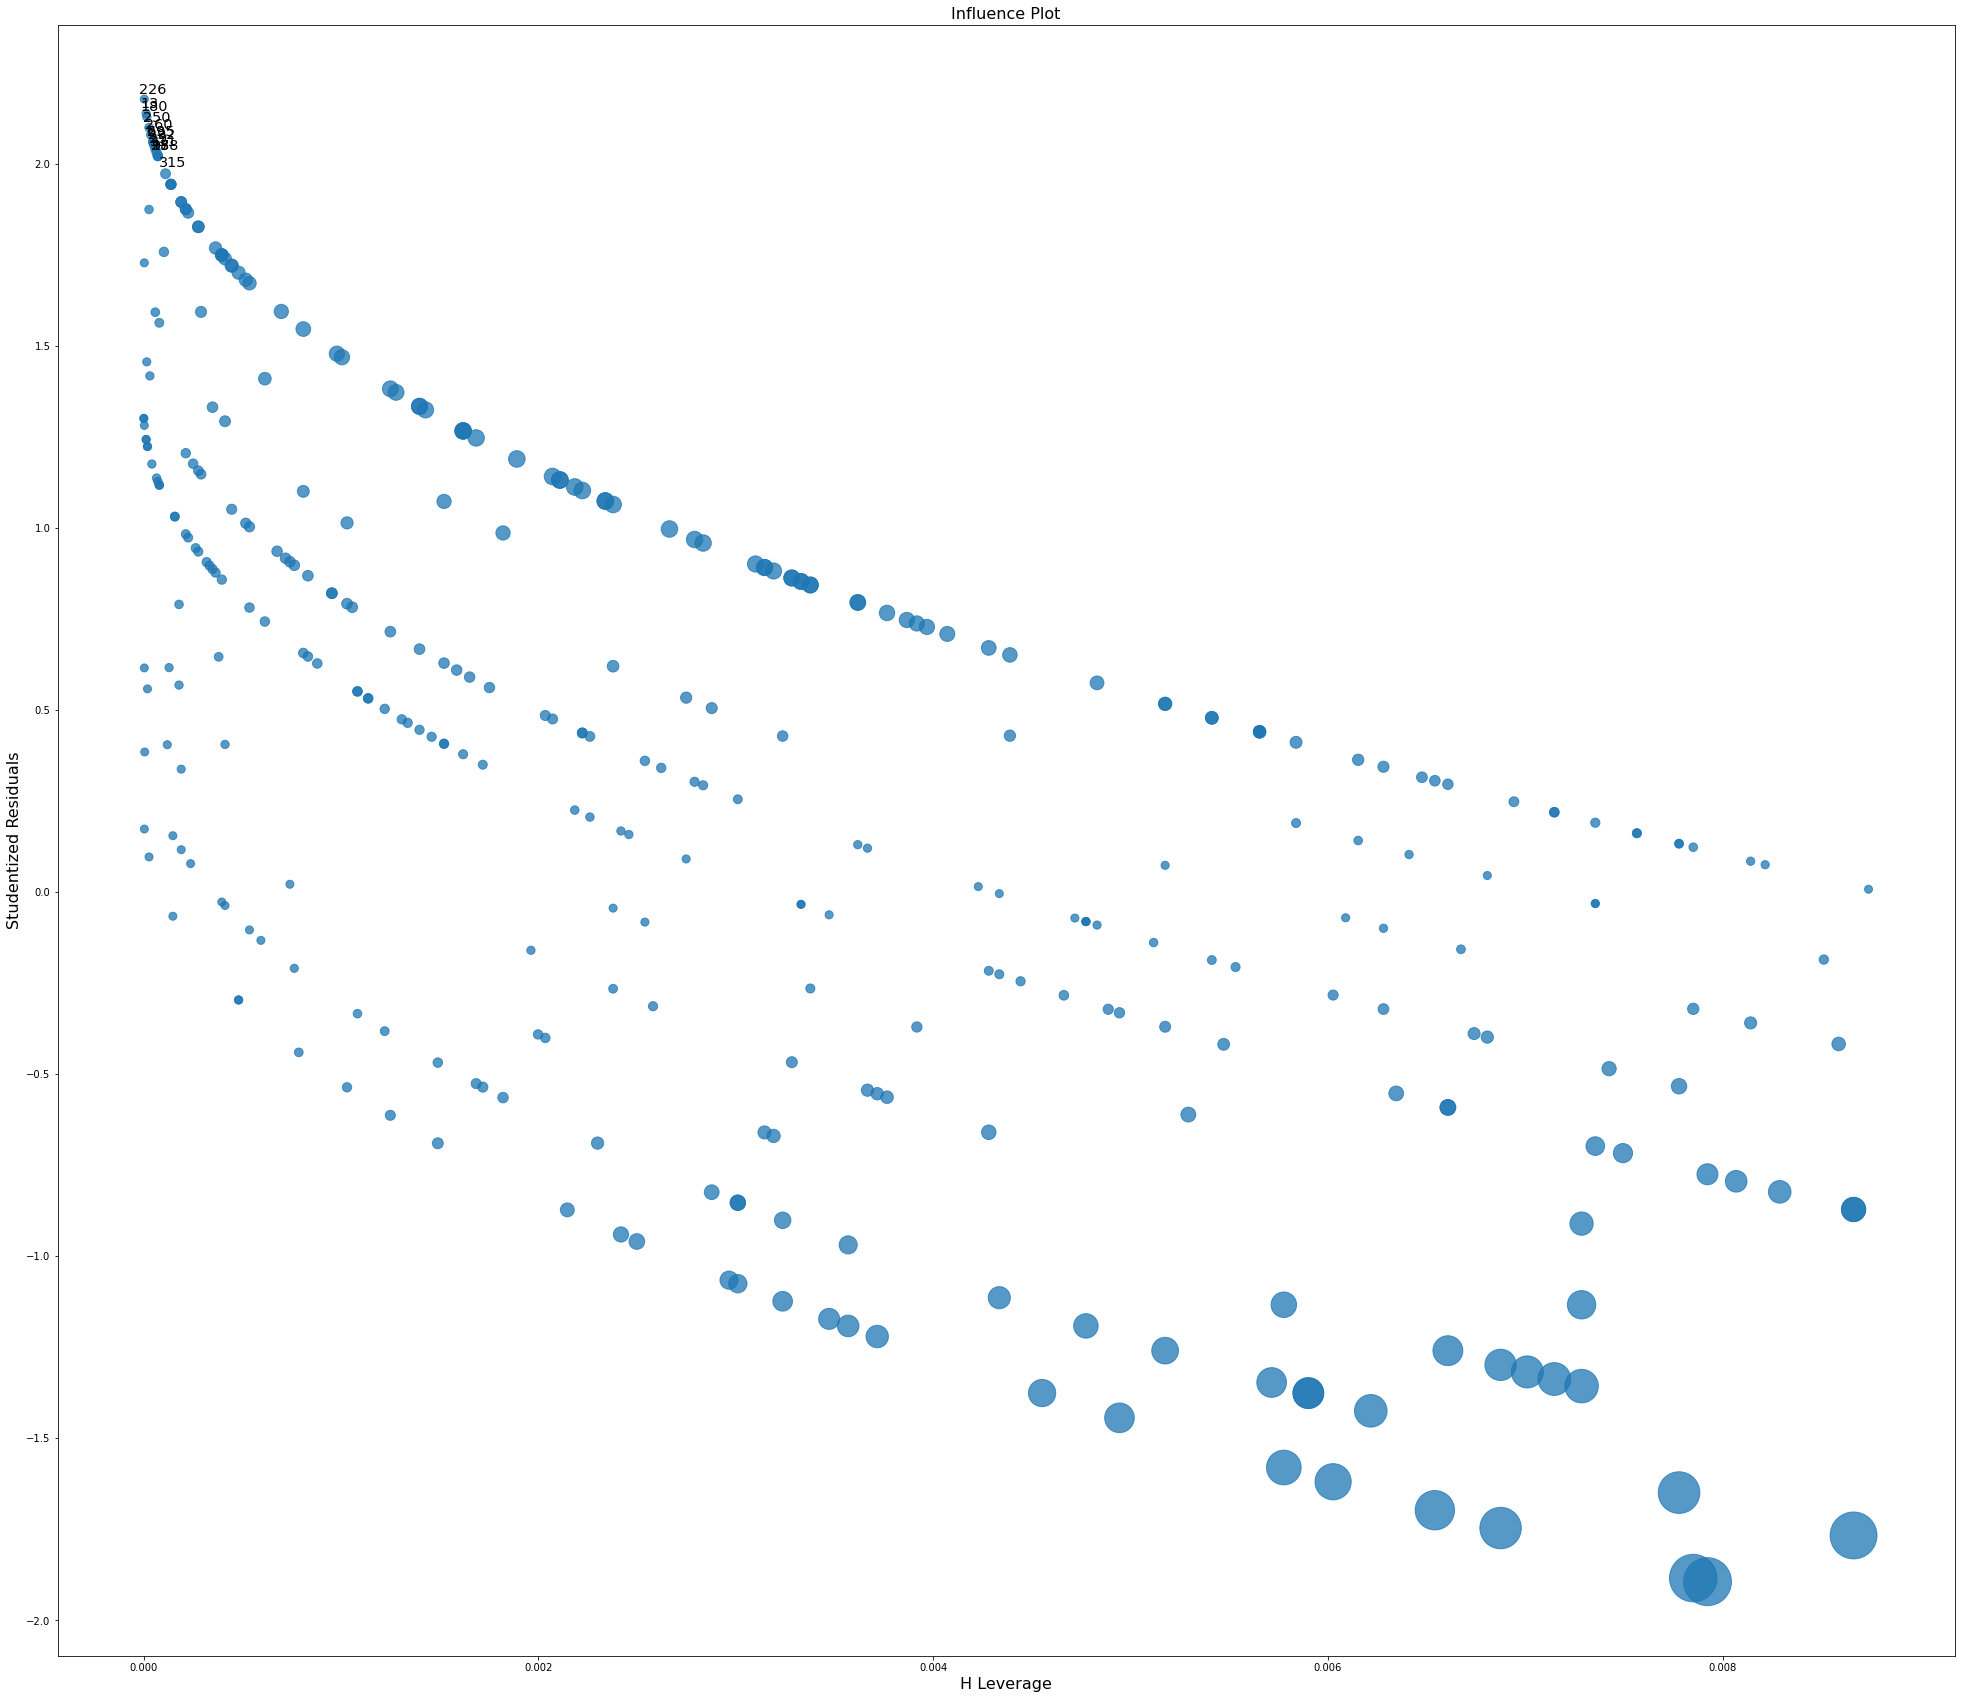

In [38]:
fig, ax = plt.subplots(figsize=(34,30))
fig = sm.graphics.influence_plot(model, 
                                 alpha = .05, ax = ax, criterion="cooks")

### In the above scatter plots the outliers have high residuals and cluster within the coordinated region (.008,2.0).

# Variant Influences

In [39]:
infl = model.get_influence()
print(infl.summary_frame())

     dfb_sales   cooks_d  standard_resid  hat_diag  dffits_internal  \
0    -0.165173  0.027116       -1.761419  0.008664        -0.164669   
1    -0.146031  0.021220       -1.645079  0.007780        -0.145669   
2     0.047938  0.002300        0.795857  0.003619         0.047963   
3     0.017959  0.000323        0.532587  0.001138         0.017978   
4     0.024971  0.000625        0.667826  0.001398         0.024991   
..         ...       ...             ...       ...              ...   
342   0.001251  0.000002        0.616253  0.000004         0.001252   
343  -0.038817  0.001510       -0.417553  0.008589        -0.038864   
344   0.018683  0.000350        0.647658  0.000833         0.018699   
345   0.014532  0.000212        0.189885  0.005839         0.014553   
346   0.007646  0.000058        1.174976  0.000042         0.007642   

     student_resid    dffits  
0        -1.766811 -0.165173  
1        -1.649162 -0.146031  
2         0.795435  0.047938  
3         0.532035  0.0

This code is about a statistical model. The model.get_influence() function is used to get some information about the data that was used to build the model. The infl.summary_frame() function is used to print a summary of this information. The summary shows some numbers for each data point that tell us how influential it is in the model. The dfb_sales column shows how much each data point's sales value is affecting the model. The cooks_d column shows how much each data point is affecting the model's predictions overall. The standard_resid column shows how different each data point's actual sales value is from what the model predicted. The hat_diag column shows how much each data point's characteristics are different from the other data points, which can affect the model. The dffits_internal and dffits columns show how much each data point is affecting the model's predictions, and the student_resid column shows how different each data point's actual sales value is from what the model predicted, taking into account how influential the data point is.

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              556.9
Date:                Sun, 26 Mar 2023   Prob (F-statistic):                    4.69e-74
Time:                        18:12:09   Log-Likelihood:                         -1015.1
No. Observations:                 347   AIC:                                      2032.
Df Residuals:                     346   BIC:                                      2036.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sales          0.0433      0.002     23.599      0.000       0.040       0.047
==============================================================================
Omnibus:                        9.714   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.383
Skew:                          -0.186   Prob(JB):                       0.0411
Kurtosis:                       2.449   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation: ratings are dependent on sales. 



This is a summary of a math model that tries to predict how much people will like something based on how much money is made from it (sales). The model says that sales is a very good predictor of how much people will like it (R-squared is 0.617, which is pretty high). The summary also shows some statistics that tell us how accurate the model is and how much we can trust its predictions.



 The overall model is statistically significant, because the pvalue is< .05. Because the p value is < .05, you can determine that there is a response in rating relating to sales.

However, looking at the R-squared and Adj.R-squared in the upper right hand corner, you see that this model accounts for 61% of the variance meaning that the rating is influcnence by other variables or there is a non-linear relationship between sales and rating. 

The Omnibus does not indicate normality.
The Prob(Omnibus)has normally distributed residuals being close to zero therefore is considered normally distributed.
Durbin Watson test indicates Homoscedasticity
Condition No. indicates low multicollinearity.
Jarque-Bera, Skew, and Kurtosis has failed.

# Dog ownership statistics

#### Americans spend about $99 billion on their pets and pet products every year
#### Millennials are the largest segment of pet owners at 32%
#### 4 million dogs are adopted from shelters each year
#### There are 471 million pet dogs kept as pets worldwide
#### 6-8 million dogs enter shelters each year

#### Arkansas is number one for dog ownership in the country
#### 38.4% of American households own a dog.
#### In 2018, Americans owned 76,811,305 dogs.
#### Nearly 40% of households in the United States own at least 1 pet dog.
#### 40% of the dogs in shelters are purebreds

#### 44 percent of dog owners adopted their precious pups from a rescue or shelter
#### Dog ownership increased by nearly 11% during the COVID-19 pandemic in 2020.
#### Small dogs remain the most popular size – 47% of dog owners have small dogs.
#### Pet owners shopping online increased by almost 20%, up to 86%. Before the pandemic, 60% of pet owners usually purchased pet products at brick-and-mortar stores. During the pandemic, in-person shopping dropped to 41%, while 80% of dog owners bought dog food online.
#### For the first time, pet industry sales exceeded $100 billion, according to American Pet Products Association (APPA) 2020 State of the Industry Report.


### (For more additional statistics, consider the full reports generated by the American Veterinary Medical Association, the Humane Society, and PetFoodIndustry.com:)

# What country has the highest product rating and sales for small dogs?

# Country with the highest dog ownership? USA

#### The USA has the most dogs in the world per capita – as of 2021, 
#### there are 274 dogs for every 1000 people, and the vast majority of 
#### those are considered pets
#### USA holds 40% share of product sales in the world

# Independent CHI-Square

In [41]:
psr2020_size['rating_bin'] = psr2020_size.rating.replace([1,2,3,4,5,6,7,8,9,10], [1,1,1,2,2,2,3,3,3,4])

In [42]:
CTpsr2020 = pd.crosstab(psr2020_size["rating_bin"], psr2020_size["product_category"])

In [43]:
psr2020_size.rating.value_counts()

10    105
6      67
7      52
2      30
1      26
8      18
3      15
9      14
4      12
5       8
Name: rating, dtype: int64

In [44]:
psr2020_size.product_category.value_counts()

Equipment      51
Snack          51
Toys           51
Medicine       34
Supplements    33
Food           33
Accessory      19
Bedding        19
Housing        19
Clothes        19
Grooming       18
Name: product_category, dtype: int64

In [45]:
psr2020_size

product_id product_category  sales  price    country     pet_size  \
0          4362        Accessory    229  12961      India        small   
1          4836        Equipment    217  18681     Turkey        small   
2          4662        Equipment    148  12373      India        small   
3          4864            Snack     83  12594    Germany        small   
4          4770        Equipment     92   1923  Singapore        small   
..          ...              ...    ...    ...        ...          ...   
342        4326         Medicine      5  15682      India  extra_large   
343        4426      Supplements    228  18570      India  extra_large   
344        4436         Medicine     71   5946      India  extra_large   
345        4476          Clothes    188   5849      India  extra_large   
346        4516        Accessory     16   7495      India  extra_large   

    pet_type  rating  re_buy  revenue  rating_bin  
0        dog       2       1  2968069           1  
1        dog       2       1  4053777           1  
2        dog      10       1  1831204           4  
3        dog       6       1  1045302           2  
4        dog       7       1   176916           3  
..       ...     ...     ...      ...         ...  
342      dog       3       1    78410           1  
343      dog       8       0  4233960           3  
344      dog       6       1   422166           2  
345      dog       9       1  1099612           3  
346      dog       6       0   119920           2  

[347 rows x 11 columns]

# Import packages

In [46]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency 
from scipy.stats import chi2 
from scipy.stats import ttest_ind
import pandas as pd

# Contingency Table (Rating & Product Category)

In [47]:
chi2_contingency(CTpsr2020)

Chi2ContingencyResult(statistic=63.89225713797653, pvalue=0.0003034380625103495, dof=30, expected_freq=array([[ 3.88760807,  3.88760807,  3.88760807, 10.4351585 ,  6.75216138,
         3.68299712,  3.88760807,  6.95677233, 10.4351585 ,  6.75216138,
        10.4351585 ],
       [ 4.76368876,  4.76368876,  4.76368876, 12.78674352,  8.27377522,
         4.5129683 ,  4.76368876,  8.52449568, 12.78674352,  8.27377522,
        12.78674352],
       [ 4.59942363,  4.59942363,  4.59942363, 12.34582133,  7.98847262,
         4.3573487 ,  4.59942363,  8.23054755, 12.34582133,  7.98847262,
        12.34582133],
       [ 5.74927954,  5.74927954,  5.74927954, 15.43227666,  9.98559078,
         5.44668588,  5.74927954, 10.28818444, 15.43227666,  9.98559078,
        15.43227666]]))

In [107]:
observed = CTpsr2020.values
expected = chi2_contingency(CTpsr2020)[3]
residuals = observed - expected
residuals

array([[ -1.79827089,  -2.78097983,   0.5907781 ,   3.98847262],
       [  1.99711816,  -4.03170029,  -2.65129683,   4.68587896],
       [ -2.2074928 ,  -0.28242075,  -2.89337176,   5.3832853 ],
       [ -2.00288184,  -5.03170029,  -0.65129683,   7.68587896],
       [  4.01152738,  12.12680115,   5.60518732, -21.74351585]])

Positive values indicate that the observed frequency is higher than the expected frequency, while negative values indicate that the observed frequency is lower than the expected frequency. Cells with large positive values contribute the most to the significant chi-squared value because they have the largest deviation from the expected frequencies. Conversely, cells with small or negative values contribute the least to the significant chi-squared value.


Simply, this is a table that shows the differences between the actual numbers of products that were rated highly and the numbers of products we would expect to see if there was no relationship between the rating and the product category. Positive numbers mean there were more highly rated products in that category than expected, while negative numbers mean there were fewer highly rated products than expected. The larger the number, the more different it is from what we would expect to see by chance.

In [48]:
CTpsr2020

product_category  Accessory  Bedding  Clothes  Equipment  Food  Grooming  \
rating_bin                                                                 
1                         4        5        2         13     3         3   
2                         5        1        4         20     3         7   
3                         4        6        5         12    11         2   
4                         6        7        8          6    16         6   

product_category  Housing  Medicine  Snack  Supplements  Toys  
rating_bin                                                     
1                       4         7     12            3    15  
2                       4         5     19            2    17  
3                       4         6     12           10    12  
4                       7        16      8           18     7

# Contingency Table (Pet Size & Rating)

# The expected frequencies

In [49]:
CTpsr2020 = pd.crosstab(psr2020_size["pet_size"], psr2020_size["rating_bin"])

In [50]:
chi2_contingency(CTpsr2020)

Chi2ContingencyResult(statistic=31.003014093322992, pvalue=0.0019679303938808556, dof=12, expected_freq=array([[ 8.79827089, 10.78097983, 10.4092219 , 13.01152738],
       [ 9.00288184, 11.03170029, 10.65129683, 13.31412104],
       [ 9.2074928 , 11.28242075, 10.89337176, 13.6167147 ],
       [ 9.00288184, 11.03170029, 10.65129683, 13.31412104],
       [34.98847262, 42.87319885, 41.39481268, 51.74351585]]))

The output is from a chi-square test of independence between two categorical variables: "pet_size" and "rating_bin". The Chi2ContingencyResult object includes the chi-square test statistic, degrees of freedom, expected frequencies under the null hypothesis, and the p-value.

The chi-square test statistic is 31.003 with 12 degrees of freedom. The p-value is 0.00197, which is less than the significance level of 0.05, indicating strong evidence against the null hypothesis that there is no association between the two variables.

The expected frequencies are also shown, which are the frequencies expected under the assumption that the null hypothesis is true. These can be compared to the observed frequencies to see which cells contribute most to the significant chi-square value.

# The observed frequencies

In [51]:
CTpsr2020

rating_bin    1   2   3   4
pet_size                   
extra_large   7   8  11  17
extra_small  11   7   8  18
large         7  11   8  19
medium        7   6  10  21
small        39  55  47  30

To compare the observed and expected frequencies, we can visually compare the values in each cell. Cells with a large difference between the observed and expected frequencies contribute most to the significant chi-square value.

Looking at the table, we see that the observed frequencies in the cells (extra_small, 1), (extra_small, 4), and (small, 2) are higher than the expected frequencies, while the observed frequencies in the cells (extra_large, 4) and (medium, 3) are lower than the expected frequencies. These cells contribute most to the significant chi-square value.

# PET SIZE LEVELS

In [52]:
psr2020_size.pet_size.unique()

array(['small', 'medium', 'large', 'extra_small', 'extra_large'],
      dtype=object)

# Country levels

In [53]:
psr2020_size.country.unique()

array(['India', 'Turkey', 'Germany', 'Singapore', 'Belgium', 'USA'],
      dtype=object)

# Independent ttest sales difference between small & xsmall dogs

In [54]:
ttest_ind(psr2020_size.sales[psr2020_size.pet_size == "extra_small"], psr2020_size.sales[psr2020_size.pet_size == "small"])

Ttest_indResult(statistic=0.1825626349858848, pvalue=0.8553148450726864)

The output is the result of a t-test performed using the ttest_ind() function in Python. Specifically, this output represents the results of a two-sample t-test between the sales of extra_small pets and the sales of small pets in the dataset.

The statistic value in the output (0.1825626349858848) represents the calculated t-statistic for the test. This measures the difference in means between the two groups (extra_small and small) relative to the variability within each group. A t-statistic close to zero suggests that there is not a significant difference in means between the two groups.

The pvalue value (0.8553148450726864) is the two-tailed p-value associated with the t-statistic. It represents the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis (that there is no significant difference in means between the two groups) is true. A p-value greater than the significance level (usually 0.05) suggests that there is not sufficient evidence to reject the null hypothesis, and that any difference in means observed between the two groups is likely due to chance.

In this case, the p-value is quite high (0.8553148450726864), indicating that there is not sufficient evidence to reject the null hypothesis that there is no significant difference in sales between extra_small and small pets in the dataset.

# Independent ttest rating difference between small & xsmall dogs

In [55]:
ttest_ind(psr2020_size.rating[psr2020_size.pet_size == "extra_small"], psr2020_size.rating[psr2020_size.pet_size == "small"])

Ttest_indResult(statistic=1.876194805782279, pvalue=0.06199619043175881)

This is the output of an independent t-test comparing the mean rating scores between two groups: pets with extra small size and pets with small size. The output shows a t-statistic of 1.876 and a p-value of 0.062.

The t-statistic is a measure of the difference between the means of the two groups, relative to the variability within each group. A positive t-statistic indicates that the mean rating score for the extra small pets is higher than that for the small pets. However, the magnitude of the t-statistic is relatively small, which suggests that the difference between the means is not particularly large.

The p-value represents the probability of obtaining the observed difference in means by chance alone, assuming that there is no true difference between the groups. In this case, the p-value is greater than the conventional threshold of 0.05, indicating that the difference in means may not be statistically significant. However, this conclusion depends on the chosen significance level and the specific context of the study.





# Independent ttest rating difference between USA & Germany

In [56]:
ttest_ind(psr2020_size.rating[psr2020_size.country == "USA"], psr2020_size.rating[psr2020_size.country == "Germany"])

Ttest_indResult(statistic=-0.05095962852604607, pvalue=0.959552941554612)

The output shows a statistic value of -0.05095962852604607, which represents the calculated t-statistic for the test. The pvalue of 0.959552941554612 indicates the probability of obtaining such results by chance, assuming that the null hypothesis (that there is no significant difference between the two groups) is true.

In this case, the p-value is greater than the typical significance level of 0.05, so we would fail to reject the null hypothesis and conclude that there is not a significant difference in the ratings between pets from the USA and Germany.

# Independent ttest sales difference between USA & Germany

In [57]:
ttest_ind(psr2020_size.sales[psr2020_size.country == "USA"], psr2020_size.sales[psr2020_size.country == "Germany"])

Ttest_indResult(statistic=0.14324126501122922, pvalue=0.8866532782535443)

The output shows a t-statistic of 0.143 and a p-value of 0.887. The t-statistic indicates the difference between the mean values of the two groups, in terms of the number of standard errors. A t-statistic of 0.143 means that the means of the two groups are only 0.143 standard errors apart, which suggests that they are quite similar.

The p-value of 0.887 indicates the probability of observing such a difference in means (or larger) by chance, assuming that the true means of the two groups are equal. A p-value of 0.887 is quite large, indicating that the observed difference in means is not statistically significant at conventional levels (such as alpha = 0.05 or 0.01). Therefore, we do not have enough evidence to reject the null hypothesis that the true means of the two groups are equal.

# Ttest Assumptions

<AxesSubplot: >

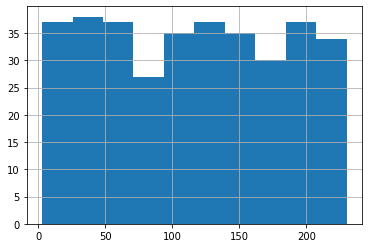

In [58]:
psr2020_size["sales"].hist()

<AxesSubplot: >

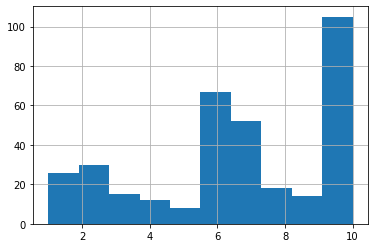

In [59]:
psr2020_size["rating"].hist()

<AxesSubplot: >

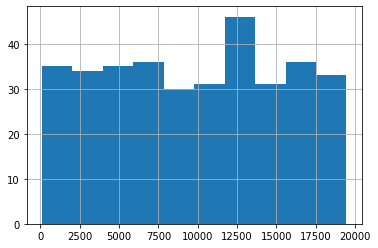

In [60]:
psr2020_size["price"].hist()

<AxesSubplot: >

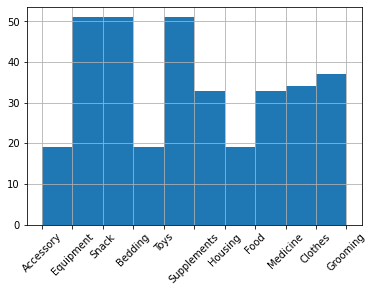

In [61]:
psr2020_size["product_category"].hist(xrot=45,)

<AxesSubplot: >

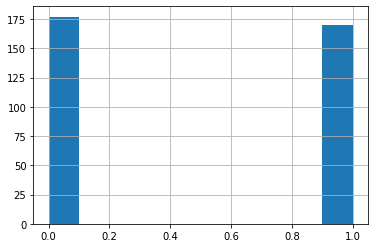

In [62]:
psr2020_size["re_buy"].hist()

<AxesSubplot: >

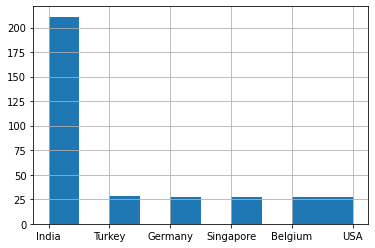

In [63]:
psr2020_size["country"].hist()

<AxesSubplot: >

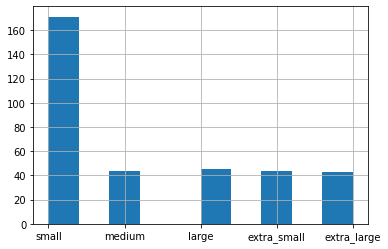

In [64]:
psr2020_size["pet_size"].hist()

# Stepwise Regressions

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
psr2020_dog_stepwise = psr2020_dog.copy() 

In [67]:
psr2020_dog_stepwise

index  product_id product_category  sales  price  VAP vendor_id  \
0        3        4364            Snack     69  18559    1    VC_929   
1        4        4184      Supplements    138  10283    1    VC_749   
2        6        4380             Toys     79  13519    1    VC_945   
3        9        4238         Medicine    141  19082    1    VC_803   
4       10        4650            Snack    185  14479    1   VC_1215   
..     ...         ...              ...    ...    ...  ...       ...   
342    857        4808             Toys    118  17661    0   VC_1373   
343    859        4554          Bedding    107   8058    0   VC_1119   
344    860        4776        Equipment    170  18115    0   VC_1341   
345    877        4664          Bedding     34  15319    1   VC_1229   
346    878        4850             Toys     54  13219    0   VC_1415   

       country     pet_size pet_type  rating  re_buy  
0        India        large      dog       1       1  
1        India        large      dog      10       0  
2        India  extra_small      dog       8       0  
3        India       medium      dog      10       1  
4        India  extra_small      dog      10       1  
..         ...          ...      ...     ...     ...  
342        USA        small      dog       2       1  
343      India        large      dog      10       0  
344     Turkey        small      dog       7       1  
345      India        large      dog      10       1  
346  Singapore        small      dog       1       1  

[347 rows x 12 columns]

In [68]:
psr2020_dog_stepwise = psr2020_dog_stepwise.drop(['vendor_id','product_id'], axis=1)

In [69]:
psr2020_dog_stepwise = psr2020_dog_stepwise.drop(["pet_type","index"], axis=1)

In [70]:
psr2020_dog_stepwise['pet_size'].unique()

array(['large', 'extra_small', 'medium', 'small', 'extra_large'],
      dtype=object)

In [71]:
psr2020_dog_stepwise['pet_size'] = psr2020_dog_stepwise['pet_size'].replace(['large', 'extra_small', 'medium', 'small', 'extra_large'],
                                                                            [4, 1, 3, 2,5])

In [72]:
psr2020_dog_stepwise.head()

product_category  sales  price  VAP country  pet_size  rating  re_buy
0            Snack     69  18559    1   India         4       1       1
1      Supplements    138  10283    1   India         4      10       0
2             Toys     79  13519    1   India         1       8       0
3         Medicine    141  19082    1   India         3      10       1
4            Snack    185  14479    1   India         1      10       1

In [73]:
psr2020_dog_stepwise = pd.get_dummies(psr2020_dog_stepwise)

In [74]:
psr2020_dog_stepwise.head()

sales  price  VAP  pet_size  rating  re_buy  product_category_Accessory  \
0     69  18559    1         4       1       1                           0   
1    138  10283    1         4      10       0                           0   
2     79  13519    1         1       8       0                           0   
3    141  19082    1         3      10       1                           0   
4    185  14479    1         1      10       1                           0   

   product_category_Bedding  product_category_Clothes  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   product_category_Equipment  ...  product_category_Medicine  \
0                           0  ...                          0   
1                           0  ...                          0   
2                           0  ...                          0   
3                           0  ...                          1   
4                           0  ...                          0   

   product_category_Snack  product_category_Supplements  \
0                       1                             0   
1                       0                             1   
2                       0                             0   
3                       0                             0   
4                       1                             0   

   product_category_Toys  country_Belgium  country_Germany  country_India  \
0                      0                0                0              1   
1                      0                0                0              1   
2                      1                0                0              1   
3                      0                0                0              1   
4                      0                0                0              1   

   country_Singapore  country_Turkey  country_USA  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  

[5 rows x 23 columns]

In [75]:
import statsmodels.api as sm
from sklearn.feature_selection import f_regression

y = psr2020_dog_stepwise['sales']
X = psr2020_dog_stepwise.drop("sales", axis=1)

# Define the initial regression model (with no predictors)
model = sm.OLS(y, sm.add_constant(np.zeros(len(y)))).fit()

# Perform forward selection
while True:
    pvals = f_regression(X, y)[1]
    if np.max(pvals) < 0.05:
        break
    X = X.loc[:, pvals < 0.05]
    model = sm.OLS(y, sm.add_constant(X)).fit()

# Perform backward elimination
while True:
    pvals = model.pvalues.iloc[1:]
    if np.max(pvals) < 0.05:
        break
    X = X.loc[:, pvals < 0.05]
    model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the final model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.621
Date:                Sun, 26 Mar 2023   Prob (F-statistic):            0.00396
Time:                        18:12:21   Log-Likelihood:                -1940.5
No. Observations:                 347   AIC:                             3887.
Df Residuals:                     344   BIC:                             3899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   121.00

This output shows the results of an Ordinary Least Squares (OLS) regression model that examines the relationship between the sales variable and two predictor variables, which are product_category_Food and product_category_Toys.

The R-squared value of 0.032 indicates that only 3.2% of the variance in the sales variable is explained by the two predictor variables. The Adj. R-squared of 0.026 is similar but adjusts for the number of predictors in the model.

The F-statistic of 5.621 indicates that the model as a whole is statistically significant, with a p-value of 0.00396, meaning we can reject the null hypothesis of no relationship between the predictor variables and the sales variable.

The coefficient values for the two predictor variables are -30.3674 and -25.2391, respectively. This means that the sales decrease by $30.37 and $25.24, respectively, when the product_category_Food and product_category_Toys increase by one unit, holding all other variables constant.

The standard errors for each coefficient estimate are also given. The t-values and corresponding p-values indicate whether each coefficient is statistically significant. In this case, both predictor variables have p-values less than 0.05, which indicates that they are statistically significant predictors of sales.

The constant term (121.0038) represents the expected sales when all predictor variables are equal to zero.

In [76]:
psr2020_dog

index  product_id product_category  sales  price  VAP vendor_id  \
0        3        4364            Snack     69  18559    1    VC_929   
1        4        4184      Supplements    138  10283    1    VC_749   
2        6        4380             Toys     79  13519    1    VC_945   
3        9        4238         Medicine    141  19082    1    VC_803   
4       10        4650            Snack    185  14479    1   VC_1215   
..     ...         ...              ...    ...    ...  ...       ...   
342    857        4808             Toys    118  17661    0   VC_1373   
343    859        4554          Bedding    107   8058    0   VC_1119   
344    860        4776        Equipment    170  18115    0   VC_1341   
345    877        4664          Bedding     34  15319    1   VC_1229   
346    878        4850             Toys     54  13219    0   VC_1415   

       country     pet_size pet_type  rating  re_buy  
0        India        large      dog       1       1  
1        India        large      dog      10       0  
2        India  extra_small      dog       8       0  
3        India       medium      dog      10       1  
4        India  extra_small      dog      10       1  
..         ...          ...      ...     ...     ...  
342        USA        small      dog       2       1  
343      India        large      dog      10       0  
344     Turkey        small      dog       7       1  
345      India        large      dog      10       1  
346  Singapore        small      dog       1       1  

[347 rows x 12 columns]

In [77]:
#chi square with size and rating 
# basic one way anova with pet size and sales
# basic one way anova with pet size and price
# pearsons r correlation with pet size and rating

# ANOVAS

# IMPORT DATA

In [78]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [79]:
!pip install scikit_posthocs

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [80]:
# Import packages
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scikit_posthocs import posthoc_ttest

In [81]:
psr2020_dog_anova = psr2020_dog.copy() 

In [82]:
psr2020_dog_anova = psr2020_dog_anova.drop(['vendor_id','product_id'], axis=1)

In [83]:
psr2020_dog_anova = psr2020_dog_anova.drop(["pet_type","index"], axis=1)

In [84]:
psr2020_dog_anova['pet_size'] = psr2020_dog_anova['pet_size'].replace(['large', 'extra_small', 'medium', 'small', 'extra_large'],
                                                                            [4, 1, 3, 2,5])

In [85]:
#psr2020_dog_anova = pd.get_dummies(psr2020_dog_anova)

In [86]:
psr2020_dog_anova

product_category  sales  price  VAP    country  pet_size  rating  re_buy
0              Snack     69  18559    1      India         4       1       1
1        Supplements    138  10283    1      India         4      10       0
2               Toys     79  13519    1      India         1       8       0
3           Medicine    141  19082    1      India         3      10       1
4              Snack    185  14479    1      India         1      10       1
..               ...    ...    ...  ...        ...       ...     ...     ...
342             Toys    118  17661    0        USA         2       2       1
343          Bedding    107   8058    0      India         4      10       0
344        Equipment    170  18115    0     Turkey         2       7       1
345          Bedding     34  15319    1      India         4      10       1
346             Toys     54  13219    0  Singapore         2       1       1

[347 rows x 8 columns]

# Scatter Plot

<AxesSubplot: xlabel='pet_size', ylabel='sales'>

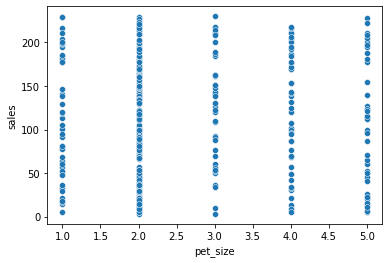

In [87]:
sns.scatterplot(data=psr2020_dog_anova, x='pet_size', y='sales')

<AxesSubplot: xlabel='pet_size', ylabel='price'>

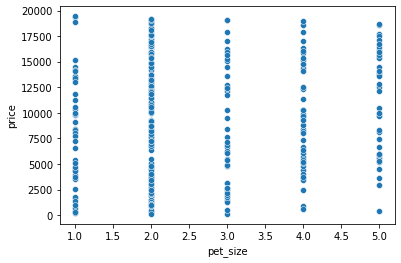

In [88]:
sns.scatterplot(data=psr2020_dog_anova, x='pet_size', y='price')

<AxesSubplot: xlabel='pet_size'>

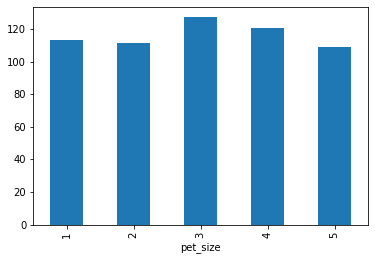

In [89]:
gby = psr2020_dog_anova.groupby('pet_size')['sales'].mean()
gby.plot(kind='bar')

<AxesSubplot: xlabel='pet_size'>

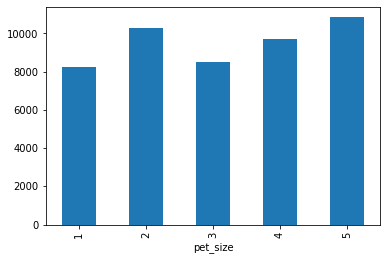

In [90]:
gby = psr2020_dog_anova.groupby('pet_size')['price'].mean()
gby.plot(kind='bar')

# Run one way ANOVA

In [91]:
psr2020_dog_anova

product_category  sales  price  VAP    country  pet_size  rating  re_buy
0              Snack     69  18559    1      India         4       1       1
1        Supplements    138  10283    1      India         4      10       0
2               Toys     79  13519    1      India         1       8       0
3           Medicine    141  19082    1      India         3      10       1
4              Snack    185  14479    1      India         1      10       1
..               ...    ...    ...  ...        ...       ...     ...     ...
342             Toys    118  17661    0        USA         2       2       1
343          Bedding    107   8058    0      India         4      10       0
344        Equipment    170  18115    0     Turkey         2       7       1
345          Bedding     34  15319    1      India         4      10       1
346             Toys     54  13219    0  Singapore         2       1       1

[347 rows x 8 columns]

In [92]:
import scipy.stats as stats

In [93]:
"""aov = pg.anova(dv='sales', between='pet_size', data=psr2020_dog_anova, detailed=True)
aov"""

"aov = pg.anova(dv='sales', between='pet_size', data=psr2020_dog_anova, detailed=True)\naov"

In [94]:
psr2020_dog_anova

product_category  sales  price  VAP    country  pet_size  rating  re_buy
0              Snack     69  18559    1      India         4       1       1
1        Supplements    138  10283    1      India         4      10       0
2               Toys     79  13519    1      India         1       8       0
3           Medicine    141  19082    1      India         3      10       1
4              Snack    185  14479    1      India         1      10       1
..               ...    ...    ...  ...        ...       ...     ...     ...
342             Toys    118  17661    0        USA         2       2       1
343          Bedding    107   8058    0      India         4      10       0
344        Equipment    170  18115    0     Turkey         2       7       1
345          Bedding     34  15319    1      India         4      10       1
346             Toys     54  13219    0  Singapore         2       1       1

[347 rows x 8 columns]

In [95]:
stats.f_oneway(psr2020_dog_anova['sales'][psr2020_dog_anova['pet_size']==1],
              psr2020_dog_anova['sales'][psr2020_dog_anova['pet_size']==2],
              psr2020_dog_anova['sales'][psr2020_dog_anova['pet_size']==3],
              psr2020_dog_anova['sales'][psr2020_dog_anova['pet_size']==4],
              psr2020_dog_anova['sales'][psr2020_dog_anova['pet_size']==5])

F_onewayResult(statistic=0.6849864409114008, pvalue=0.6027573354557584)


The output shows that the F-statistic for the ANOVA test is 0.685, and the p-value is 0.603.

The F-statistic measures the ratio of variation between the groups to the variation within the groups. In this case, the F-statistic value of 0.685 indicates that the variation between the groups is relatively small compared to the variation within the groups. This suggests that there may not be a significant difference in sales among the different levels of pet size for dogs in the psr2020_dog_anova dataset.

The p-value measures the probability of obtaining a result as extreme or more extreme than the observed result if the null hypothesis (i.e., that the means of the groups are equal) were true. In this case, the p-value of 0.603 is greater than the typical significance level of 0.05, indicating that there is insufficient evidence to reject the null hypothesis. This means that we cannot conclude that there is a significant difference in sales among the different levels of pet size for dogs in the psr2020_dog_anova dataset.

(simply, with a punc, also known as the pvlaue, of 0.603, which is above the threshold of 0.05 we can conclude that the pet_size does not have a significant influence on the mean score of the sales.) 

In [96]:
stats.f_oneway(psr2020_dog_anova['price'][psr2020_dog_anova['pet_size']==1],
              psr2020_dog_anova['price'][psr2020_dog_anova['pet_size']==2],
              psr2020_dog_anova['price'][psr2020_dog_anova['pet_size']==3],
              psr2020_dog_anova['price'][psr2020_dog_anova['pet_size']==4],
              psr2020_dog_anova['price'][psr2020_dog_anova['pet_size']==5])

F_onewayResult(statistic=2.1661557160470037, pvalue=0.07245164275673556)

The output shows a F-statistic value of 2.166 and a p-value of 0.072, both of which are reported in scientific notation.

The F-statistic measures the ratio of variation between the groups to the variation within the groups, and it represents the test statistic for the ANOVA hypothesis test. A higher F-statistic value indicates that there is a larger difference between the means of the groups compared to the variability within each group, which is evidence in favor of rejecting the null hypothesis.

The p-value is the probability of obtaining a test statistic as extreme as the one observed in the data, assuming that the null hypothesis is true. A smaller p-value indicates stronger evidence against the null hypothesis and in favor of the alternative hypothesis. In general, a p-value less than 0.05 is considered statistically significant, while a p-value greater than 0.05 suggests that there is insufficient evidence to reject the null hypothesis.

In this case, the p-value of 0.072 is greater than the typical significance level of 0.05, which means that we do not have sufficient evidence to reject the null hypothesis that there is no difference in prices between different levels of pet size among dogs in the psr2020_dog_anova dataset. Therefore, we cannot conclude that there is a significant relationship between pet size and price.

(simply, with a punc, also known as the pvlaue, of 0.072, which is above the threshold of 0.05, we can conclude that the pet_size does not have a significant influence on the mean score of the price.) 

# Does the product rating determine which product has the highest sales for small dogs?

# Supportive Visual statistics

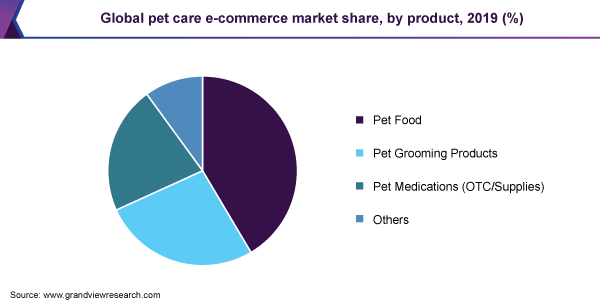

In [124]:
from PIL import Image
img = Image.open('global-pet-care-e-commerce-market-share.png')
img

This pie chart is providing the percentage of pet care products bought online in 2019. This compared to 2020 will give us a comparison in the increase and decrease if sales and the product's category. We can see that the purple portion is the largest and most popular portion of the pie chart, representing pet food. Pet food in 2019 was the most purchased product online resulting in 43%. We can only assume that this percentage increased drastically during the 2020 pandemic.

Pet grooming products, in the light blue section rank second at 27% right before the 2020 pandemic. Which makes sense because  food and grooming are the most important products in order to care and maintain a dog, so a dog owner is likely to spend more on these products throughout the year. combined, pet food and dog grooming products result in 70% of online sales in 2019.

Following are pet medications(over the counter/supplies)ranking number three at 20% and other items, such as toys, clothing,and non essential items leaving the remaining 10%.

Next we will glance at the Global revenue in the dog food market.

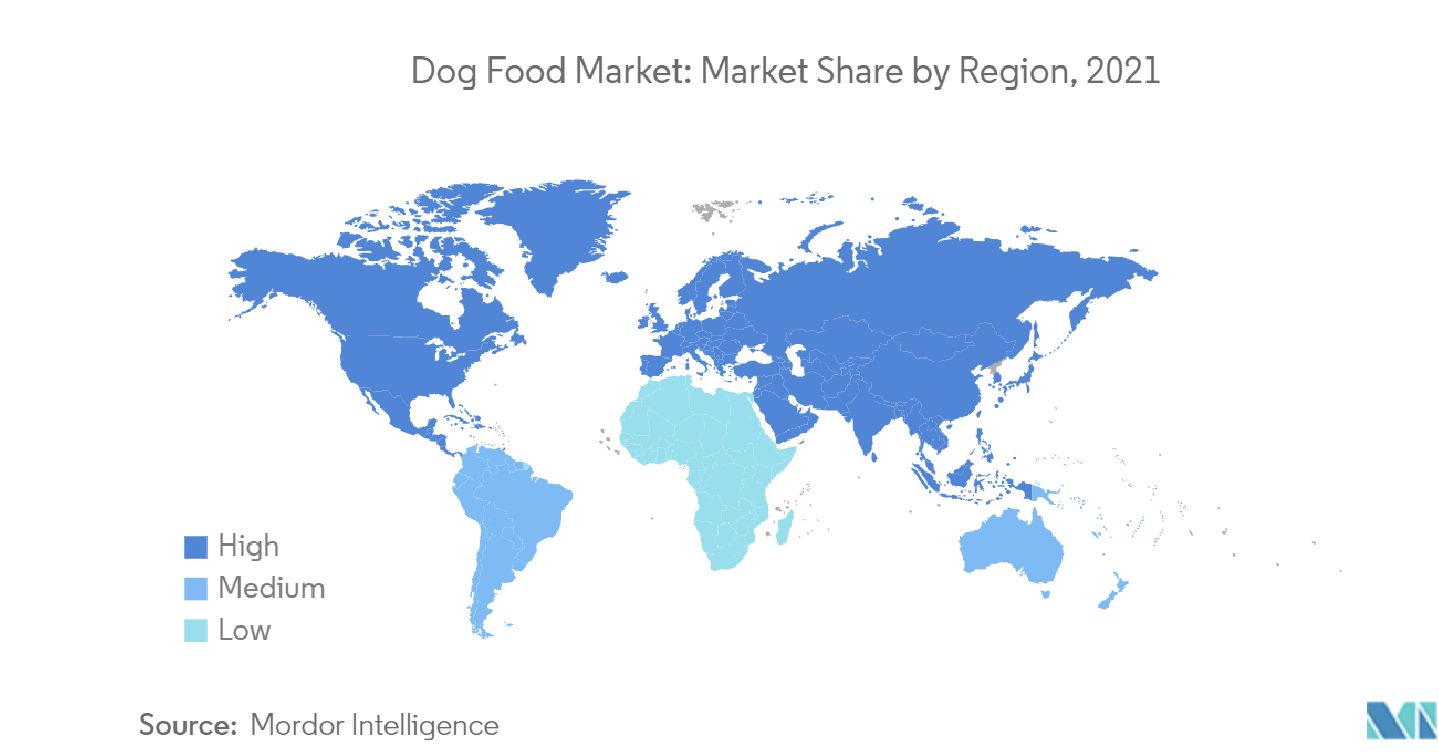

In [138]:
from PIL import Image
img = Image.open('Golbal Dog food.png')
img

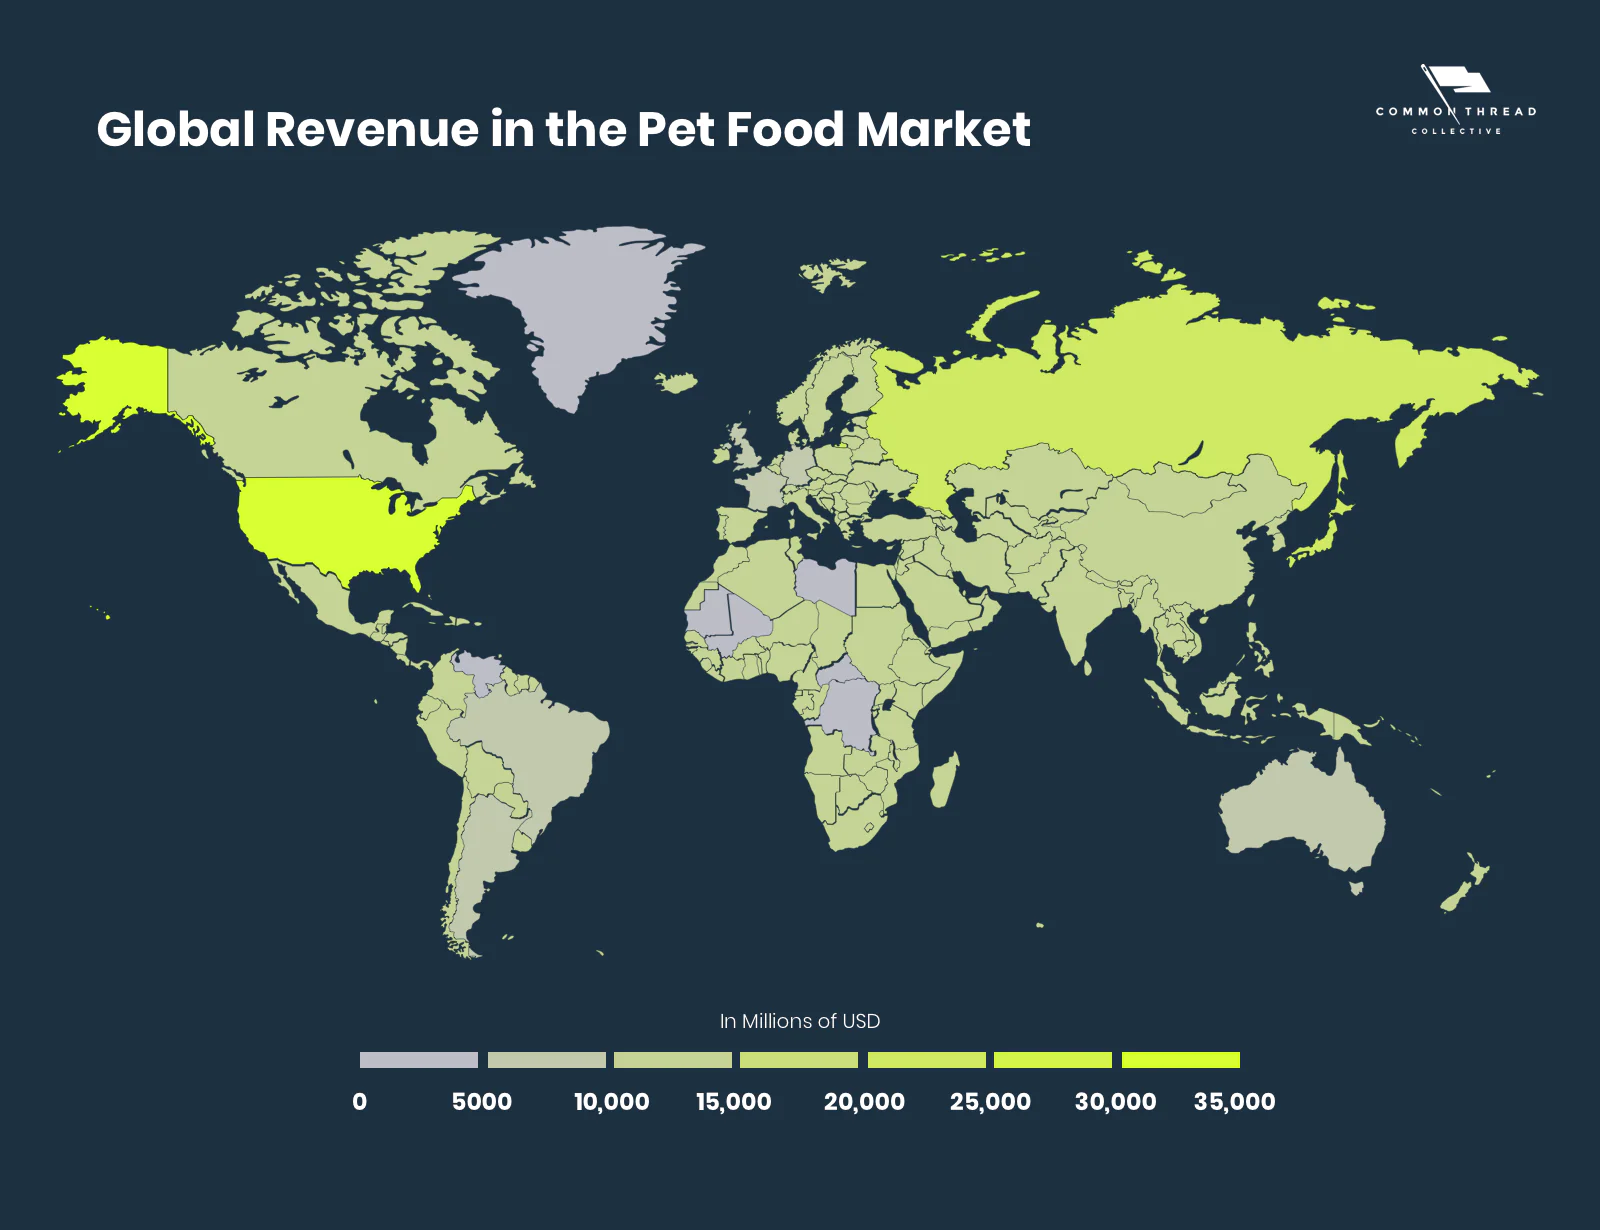

In [125]:
from PIL import Image
img = Image.open('Global_Revenue_in_the_Pet_Food_Market.png')
img

North America Dominates the Market

North America Dominates the Petfood market. Being the largest pet food market in North America, the United States pet food market's growth is attributed to the increase in pet ownership.

According to the 2019-2020 National Pet Owners Survey, conducted by the American Pet Products Association (APPA), 67% of US households (about 84.9 million families) own a pet, the maximum being dogs. The expenditure on dogs in the country has increased in recent years. The increasing health concerns of pet owners lead to the rising healthy and nutritious pet food innovations in the country. From 2019 to 2020, the average amount spent on dog treats per year is USD 76. Dental treats are used in pets to maintain oral health. According to the American Veterinary Dental Society, more than 80% of dogs develop periodontal disease by three years. In 2019, RedbarnPet Products launched its new line of dental treats called 'Chew-A-Bulls' in the country. Such developments are driving the growth of this segment in the country.

Rising acceptance of organic dog food in the country has driven the fastest growth of the market studied in the coming years. Various pet stores and major players are entering the organic dog food market to reap profits. For instance, the top five US pet food marketers, namely Nestle SA, Del Monte, Hill's Pet Nutrition, Mars, and P&G, are heavily investing in the natural and organic segment by extending their product lines in the dog food category. Also, Tender and True Organic Dog Food, Gather Free Access, Castor and Pollux Organix, Primal Freeze, and Honest Kitchen are some of the prominent brands in organic meals for dogs in the country.

Most UK homes have a pandemic dog, with 38% admitting that it is just like having a new baby, which suggests the extent of pet humanization in the country. This is massively increasing the growth of the market studied. Woofwoofnow, a global pet consultation portal, was founded in 2018. Being the most pet-friendly institution and creating a location where dog parents can rely on are the goals of Woofwoofnow. It serves as a marketplace where people may browse for pet-related services.

According to ADM, the humanization of pets gained more prominence and will continue to influence trends. Many consumers apply their preferences and values for purchases to their dogs. According to a study by ADM Outside Voice, 30% of dog owners worldwide spent a substantial amount of time in the previous year looking into the finest feeding options.The increasing consumer trend toward dog adoption drove dog food premiumization, which is anticipated to expand the dog food and ingredients market over the forecast period.



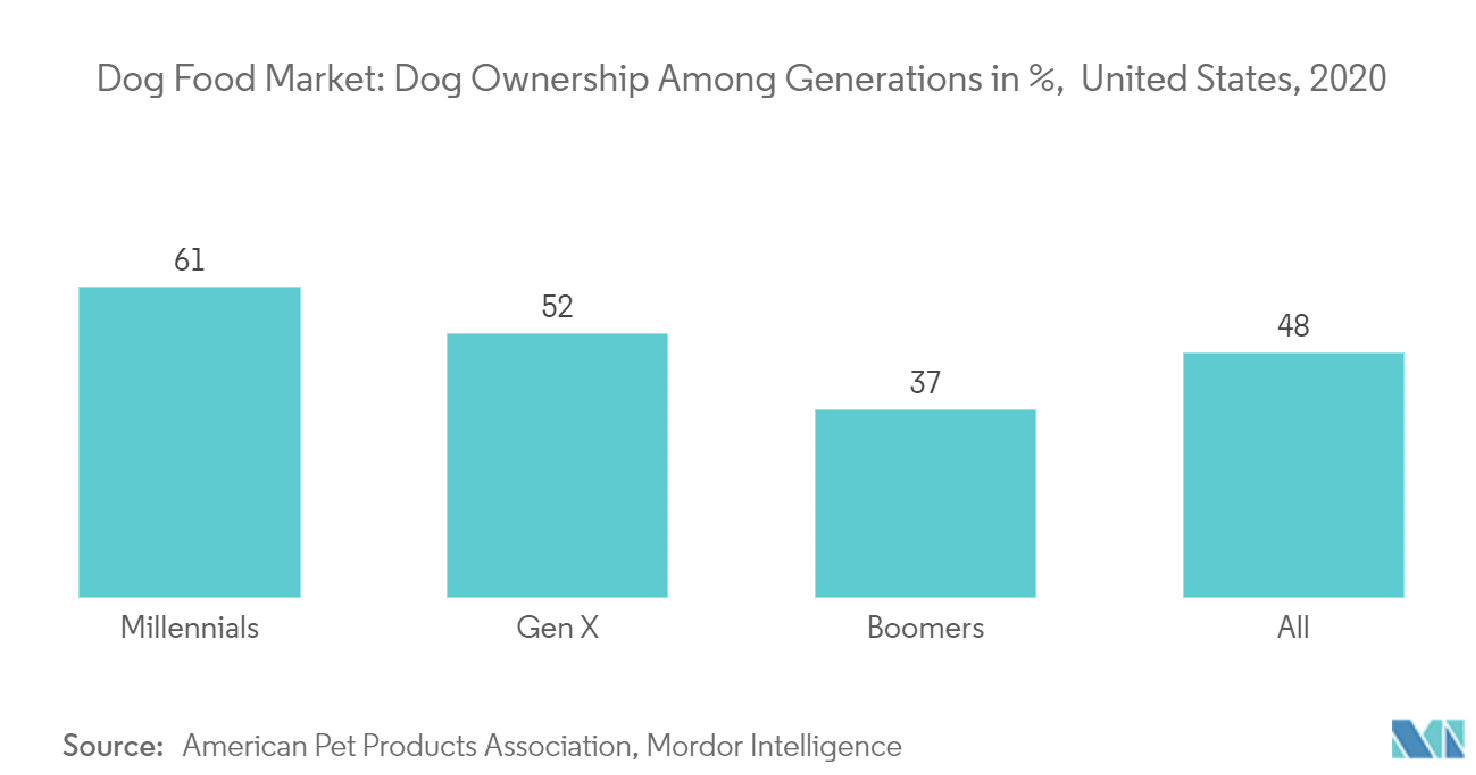

In [139]:
from PIL import Image
img = Image.open('Dog ownership.png')
img

Increasing Trend of Pet Humanization

Pet humanization has received much attention in mainstream media in recent years globally. A study conducted by the American Pet Products Association (APPA), under the National Pet Owners Survey (2020-21), revealed that more than 85 million households in the United States had one or more dogs, with 48% found in the homes. Thus, increasing pet humanization is anticipated to drive the market's growth. Per the Pet Food Manufacturer's Association (PFMA), in 2021, 3.2 million households in the United Kingdom acquired a pet since the COVID-19 pandemic. Largely driven by Gen Z and Millennials, two-thirds (59%) of new owners are aged 16-34, and 56% of new dog owners have children at home.

Most UK homes have a pandemic dog, with 38% admitting that it is just like having a new baby, which suggests the extent of pet humanization in the country. This is massively increasing the growth of the market studied. Woofwoofnow, a global pet consultation portal, was founded in 2018. Being the most pet-friendly institution and creating a location where dog parents can rely on are the goals of Woofwoofnow. It serves as a marketplace where people may browse for pet-related services.

According to ADM, the humanization of pets gained more prominence and will continue to influence trends. Many consumers apply their preferences and values for purchases to their dogs. According to a study by ADM Outside Voice, 30% of dog owners worldwide spent a substantial amount of time in the previous year looking into the finest feeding options.The increasing consumer trend toward dog adoption drove dog food premiumization, which is anticipated to expand the dog food and ingredients market over the forecast period.

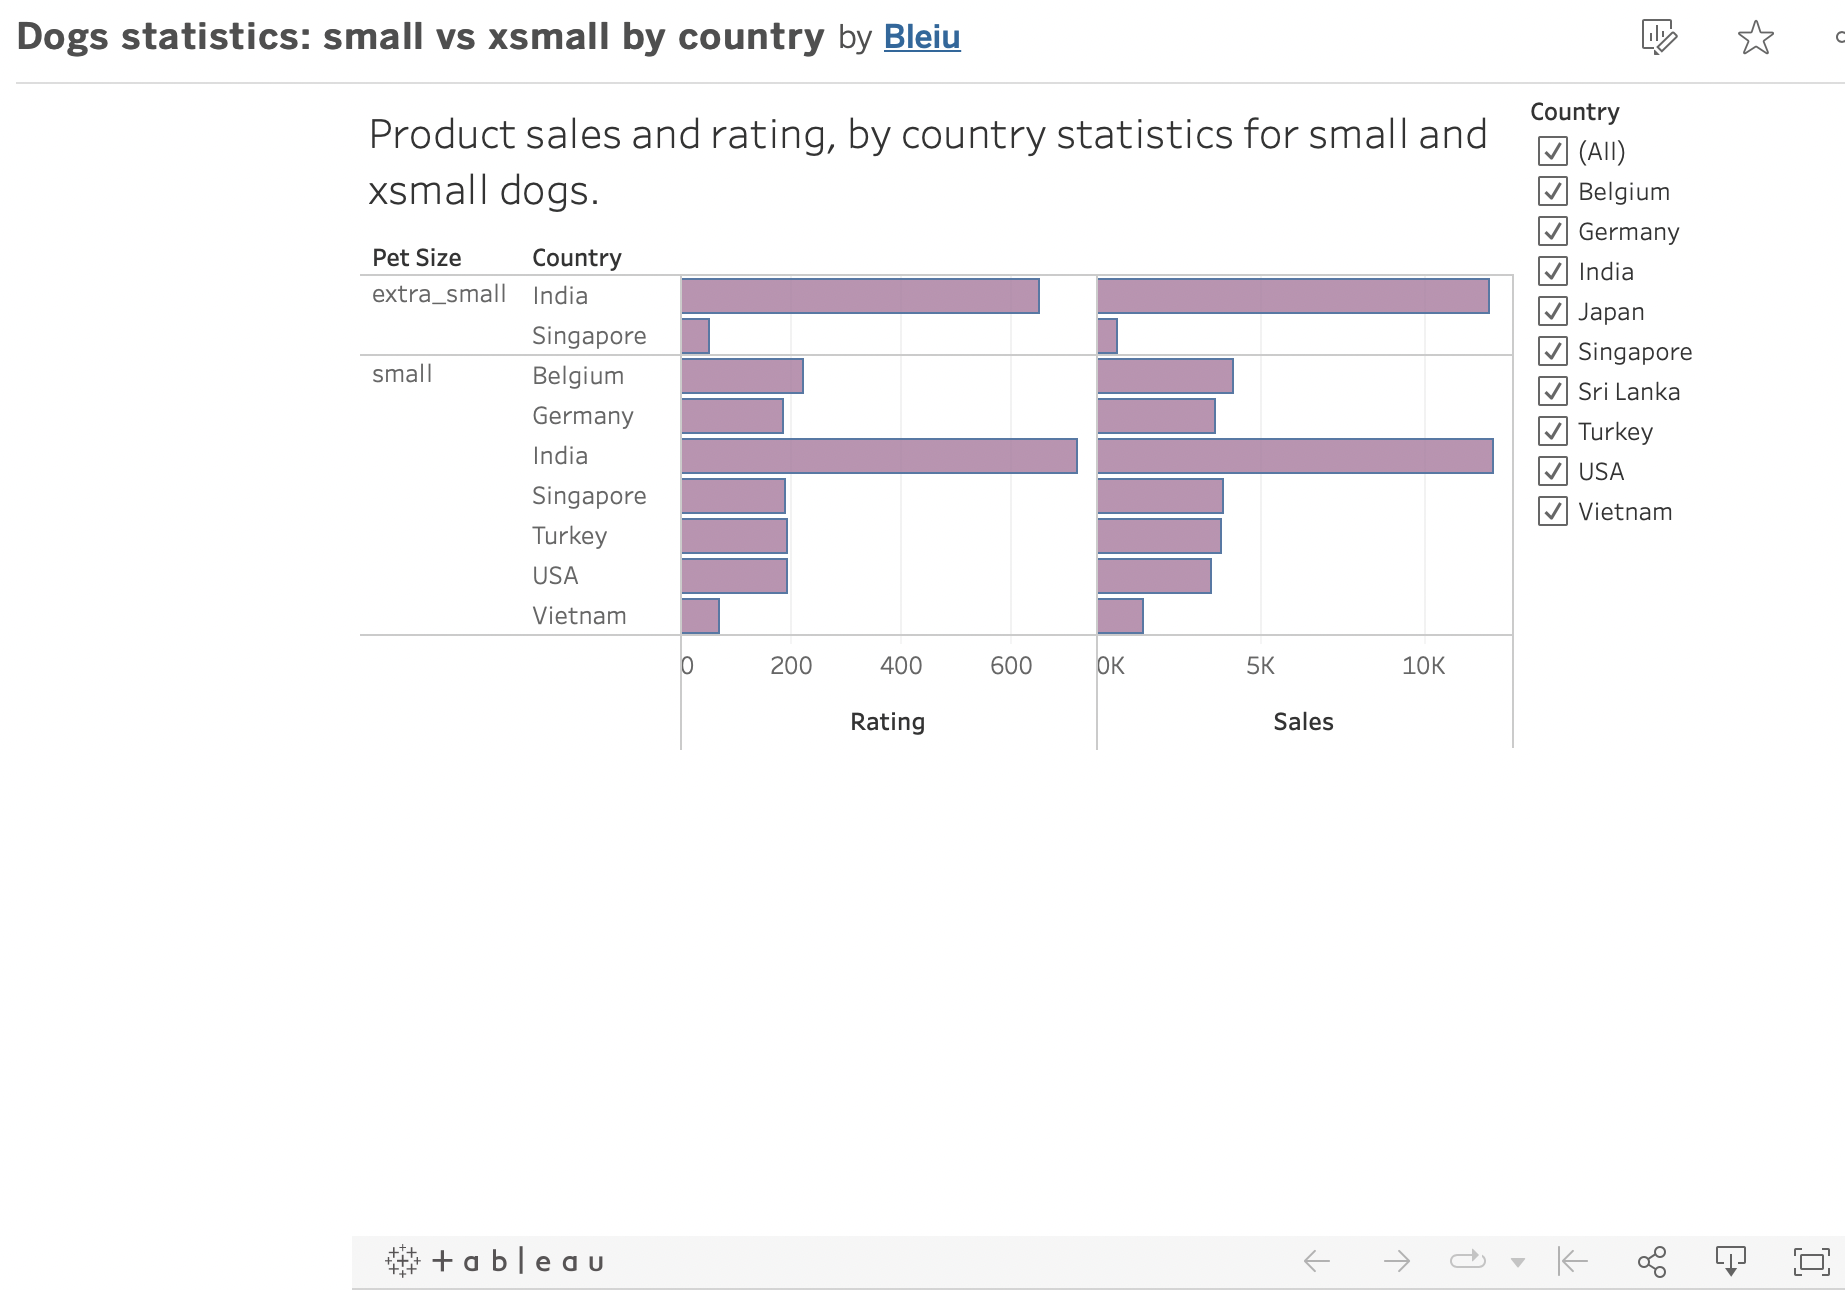

In [130]:
from PIL import Image
img = Image.open('Product sales and rating, by country statistics for small and small dogs.png')
img

India shows higher results in rating and sales withing the extra small and small dog pet sizes. Ratings have a higher recod in small dogs than extra small dogs. However, the sales are the same for both pet sizes.

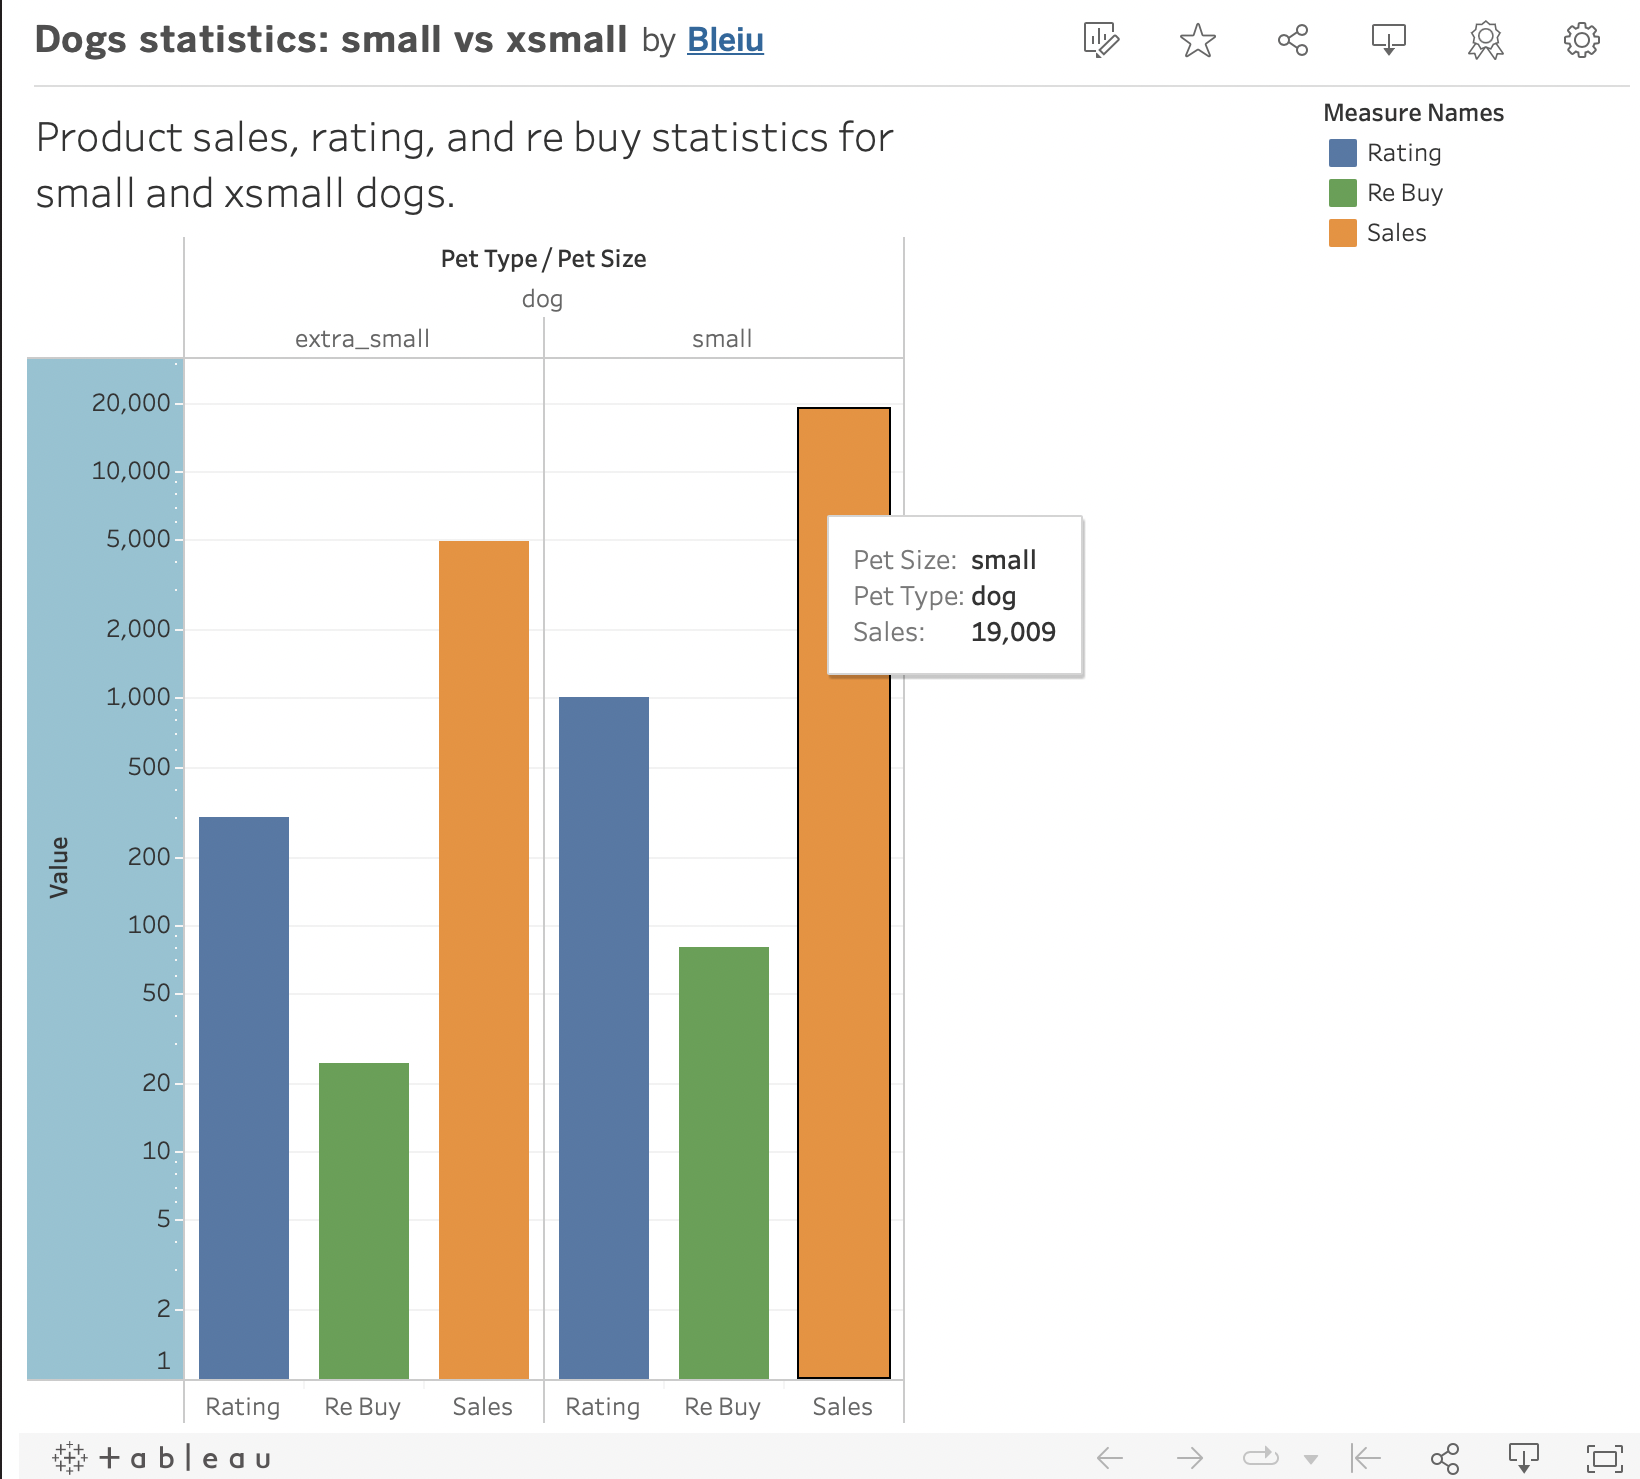

In [131]:
from PIL import Image
img = Image.open('small-xsmall.png')
img

Rebuy results increase as rating and sales increase. The rebuy results are abit over 1/3 of sales. The better the rating the higher the sales and therefore results in customers buying the product again.

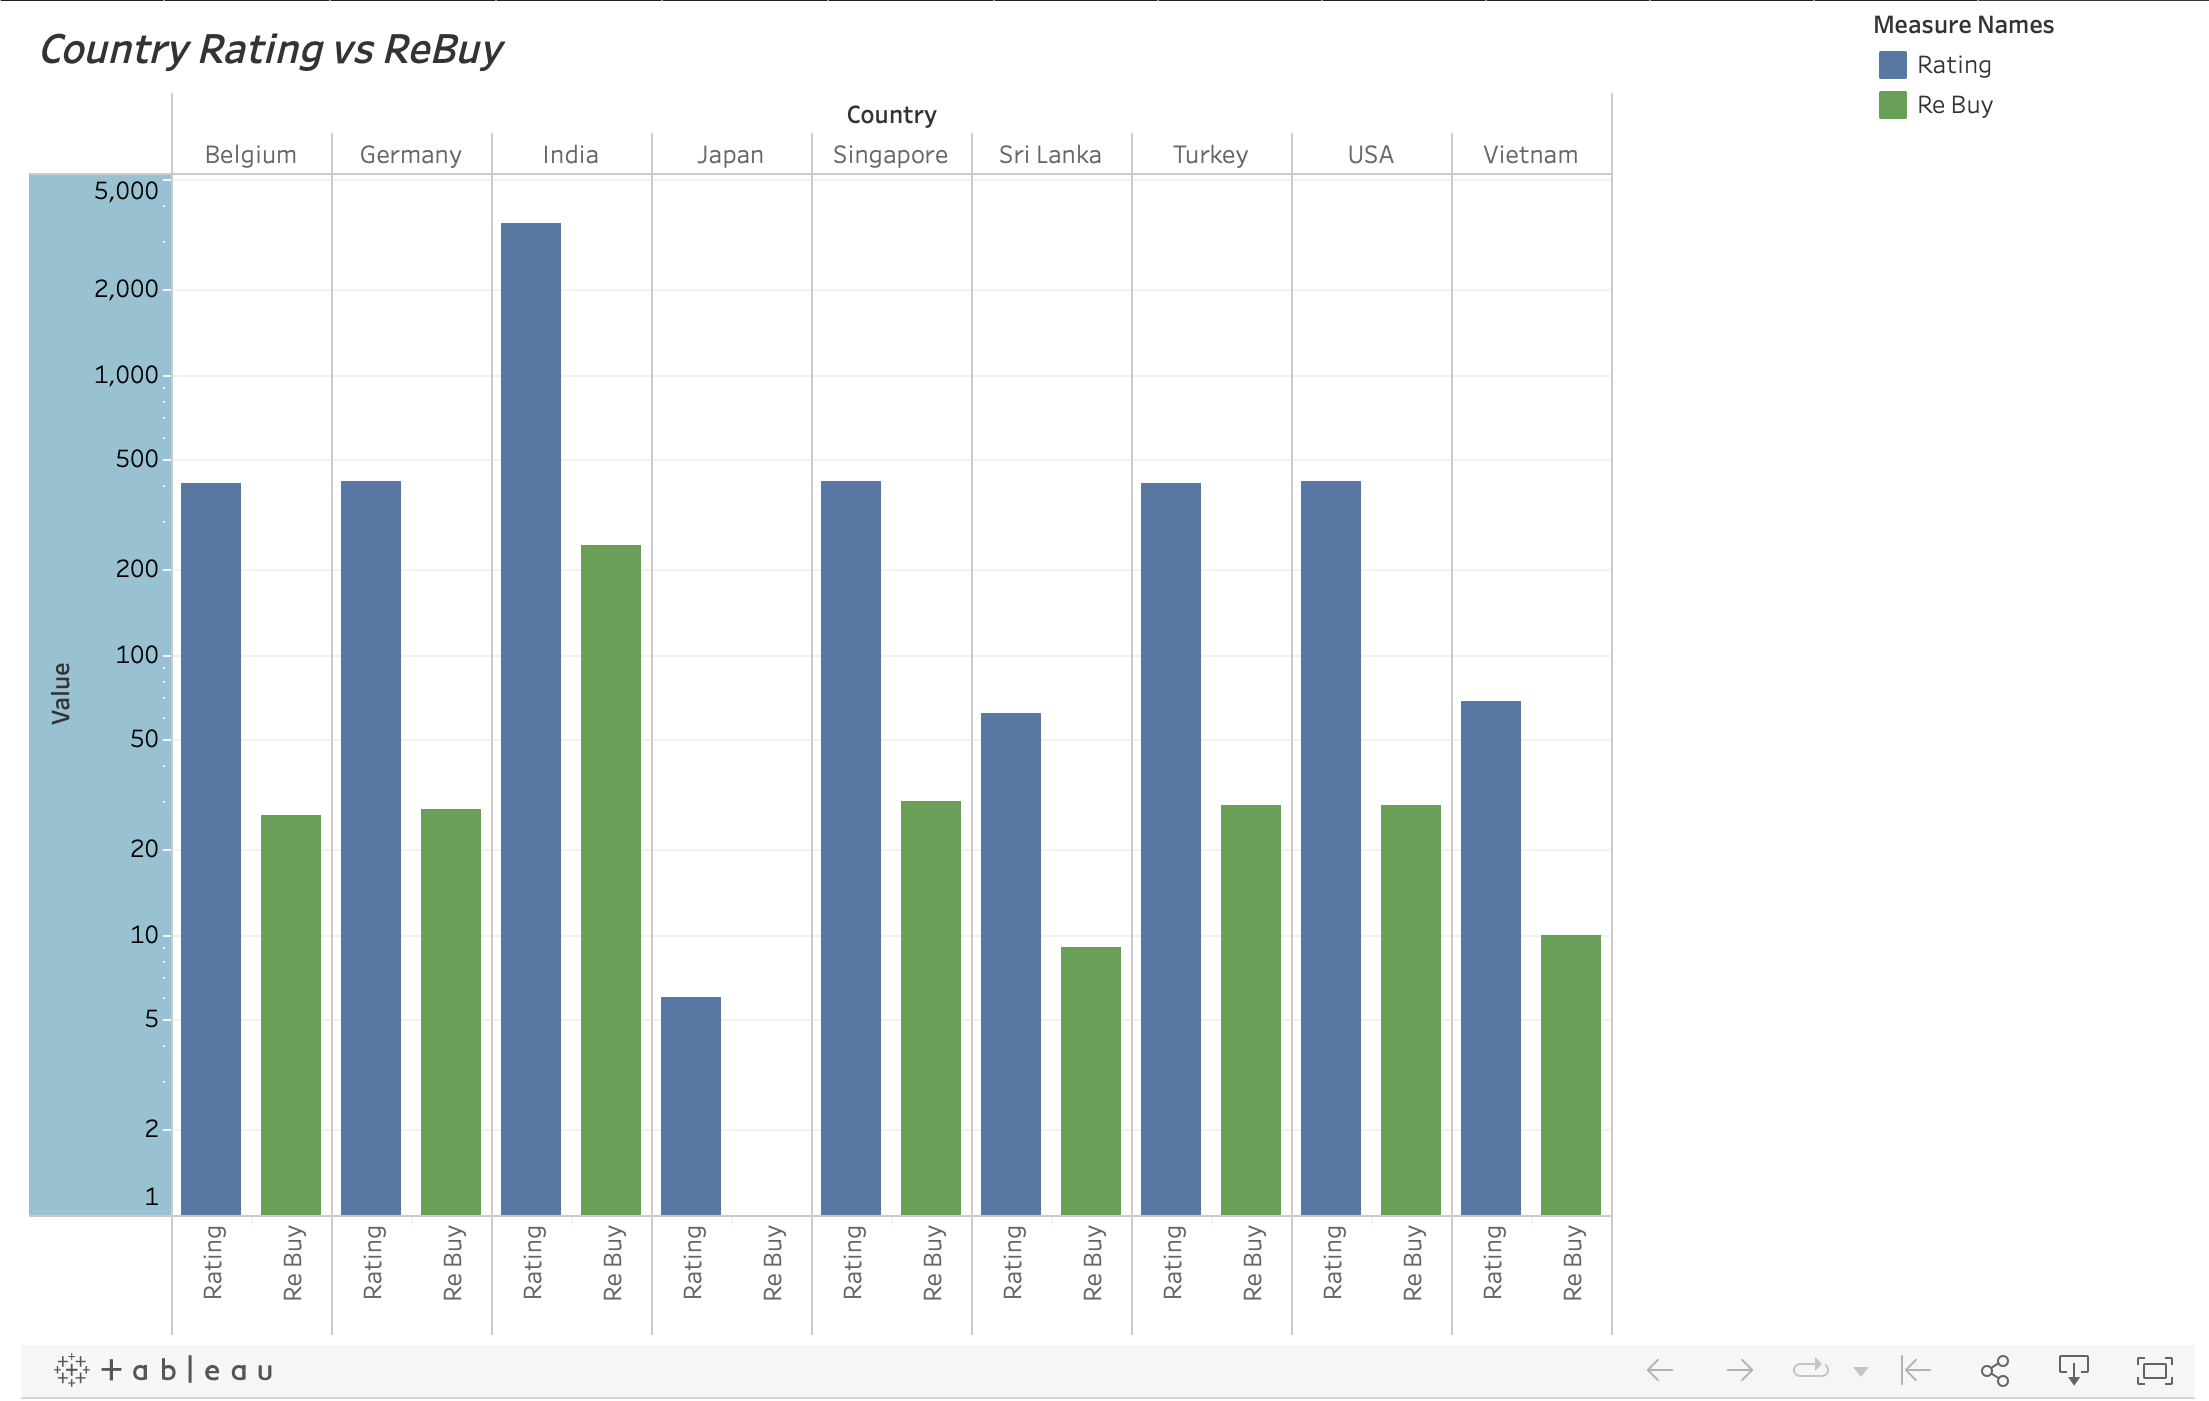

In [132]:
from PIL import Image
img = Image.open('country rating vs rebuy.png')
img

The better the rating the higher the results for customers buying the products again, which could mean theses specific products are better quality.

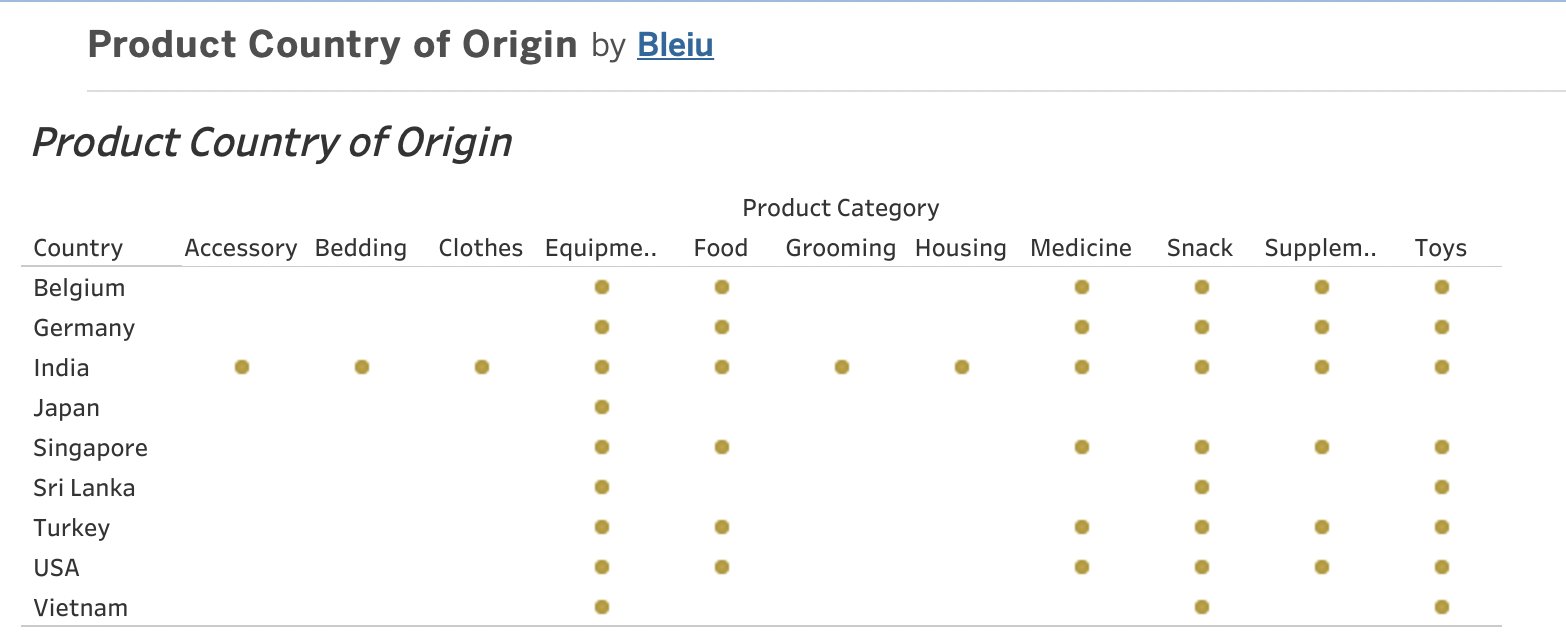

In [133]:
from PIL import Image
img = Image.open('Prouduct country of origin .png')
img

There are more products derived from india than any other company. however, the products that has the most records are derived from all companies. Only snack and toys show an exception in japan derivation.

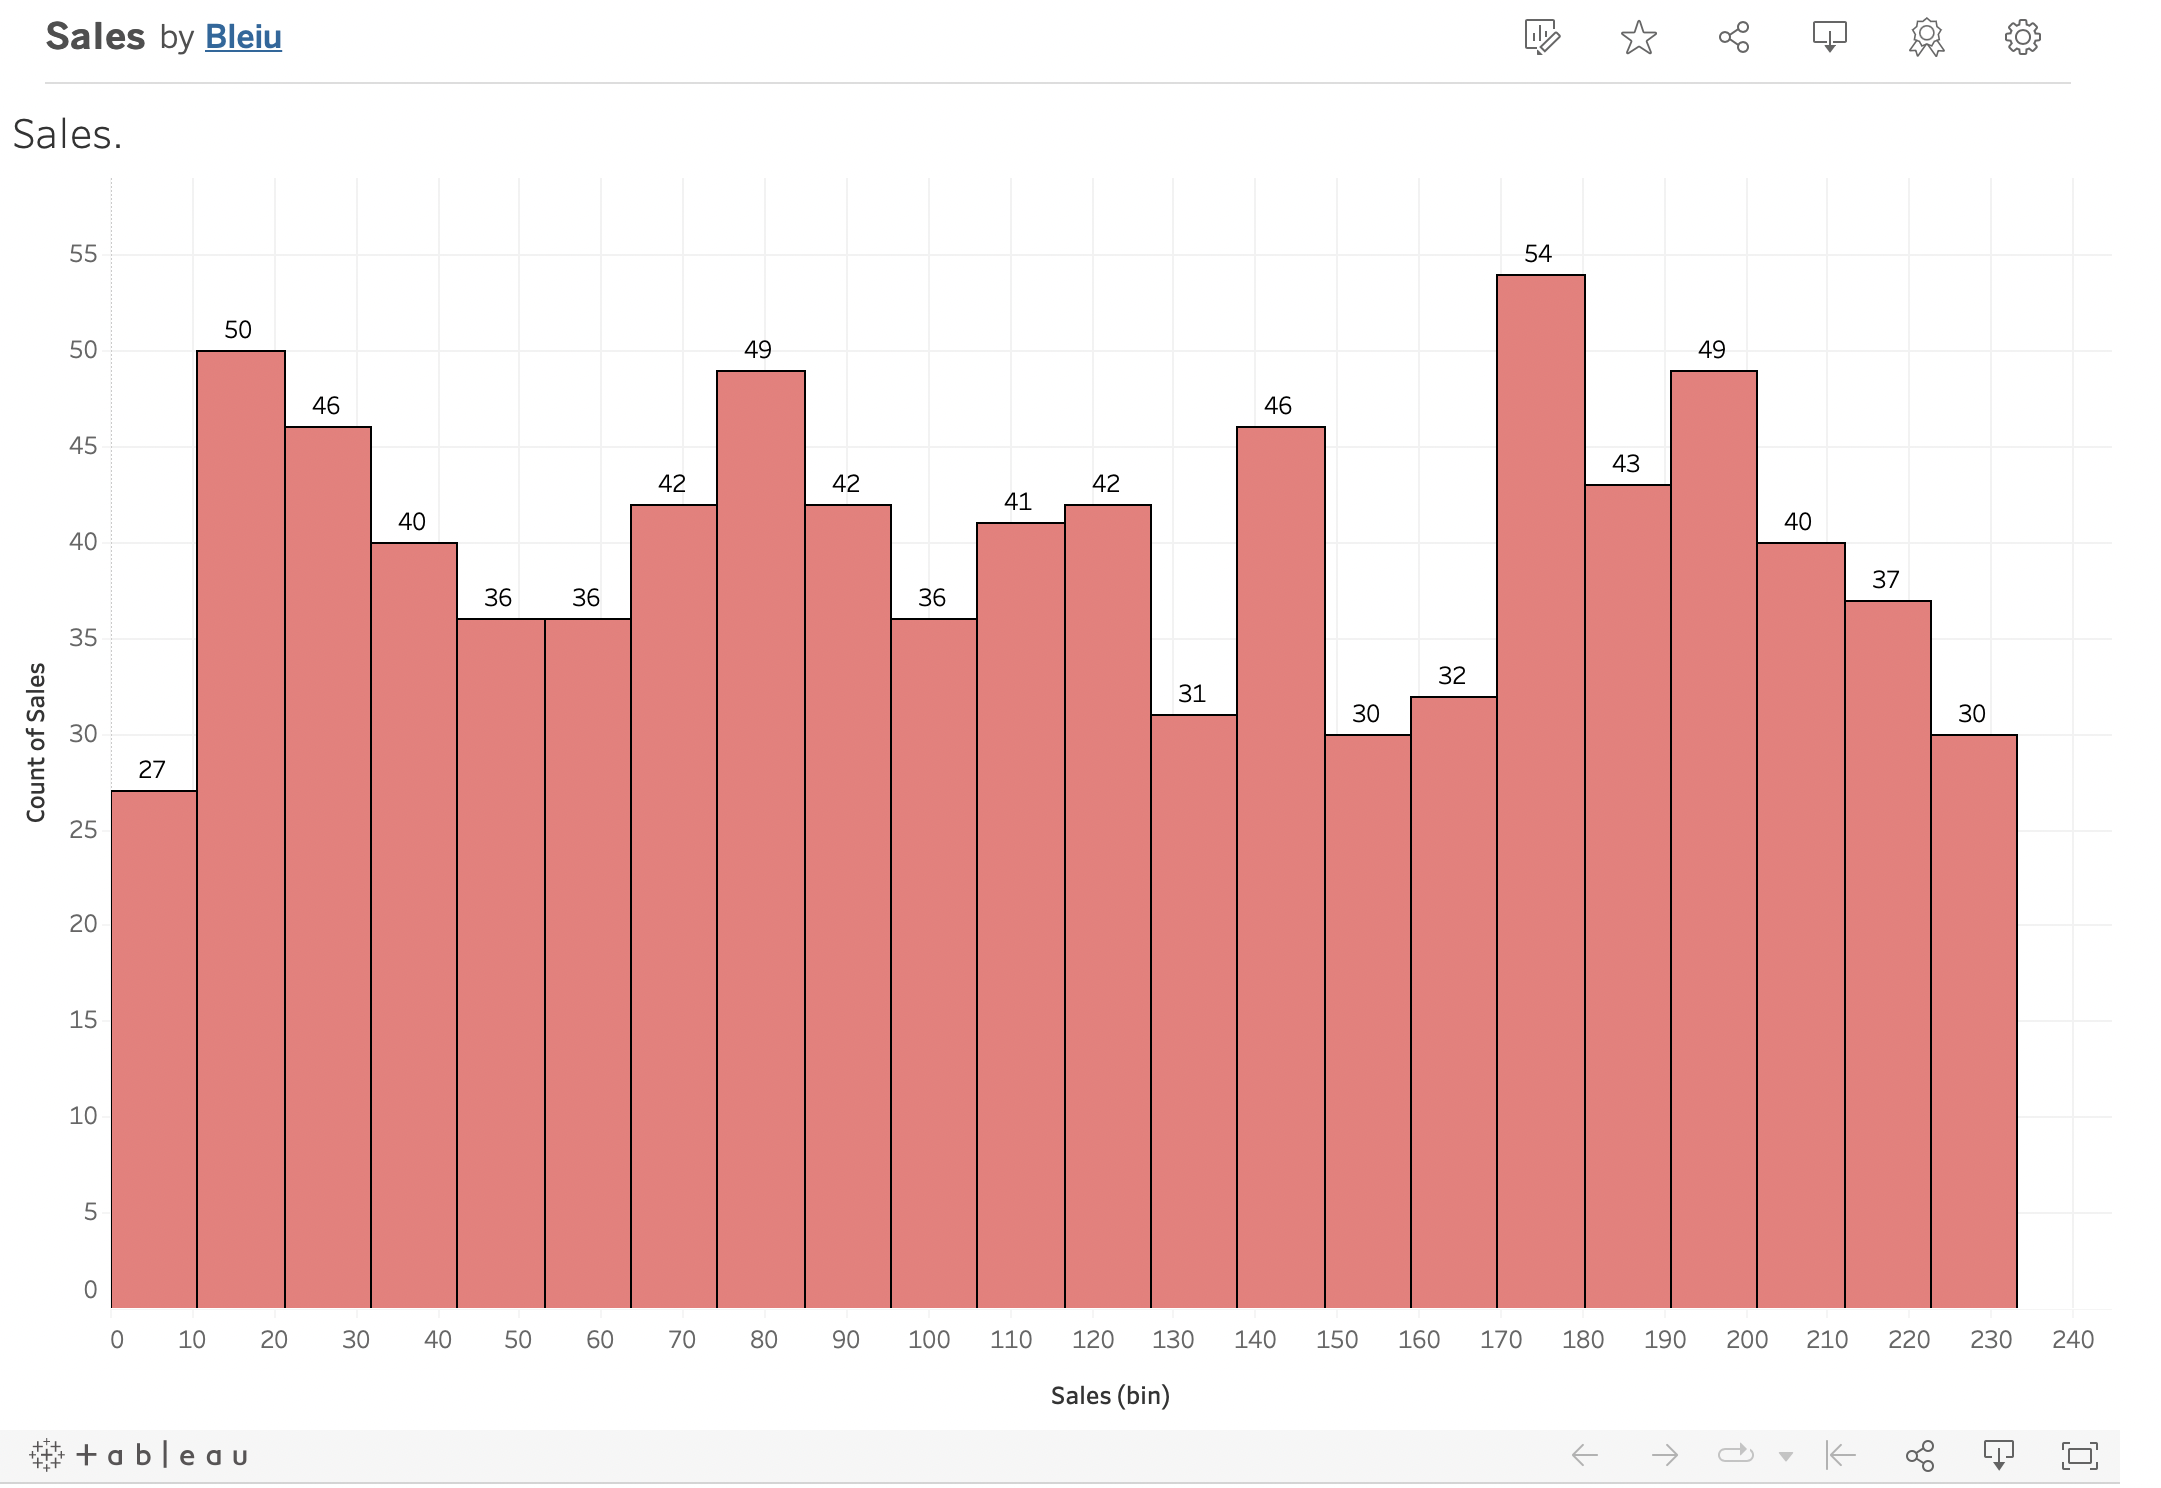

In [134]:
from PIL import Image
img = Image.open('sales.png')
img

Sales records result in inconsistent trends over time during tthe year 2020. This inconsistent trend could be due to marketing, popularity,or lack of new/updated products.

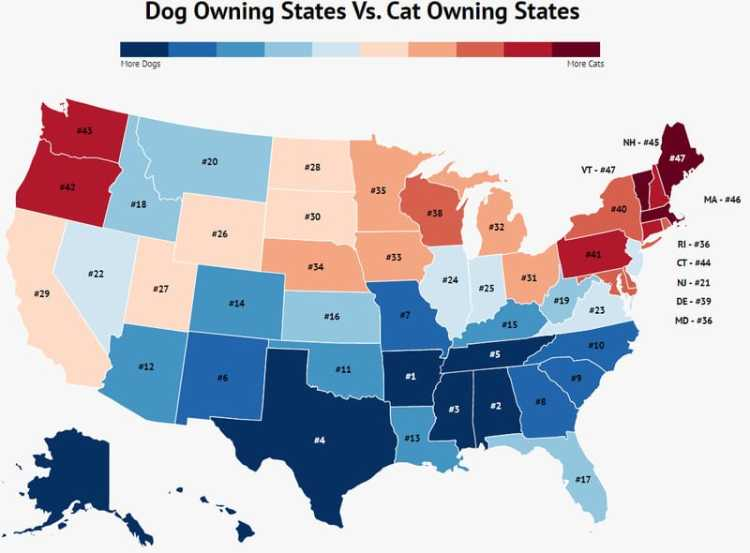

In [135]:
from PIL import Image
img = Image.open('dog-owning-vs-cat-owning-states.jpeg')
img

Dog owning in the US show more saturation withing the southern parts of the country. Arkansas,Texas, Mississippi, Alabama, Tennessee, Alaska, and Hawaii show the highest saturation of dog ownership in 2020.

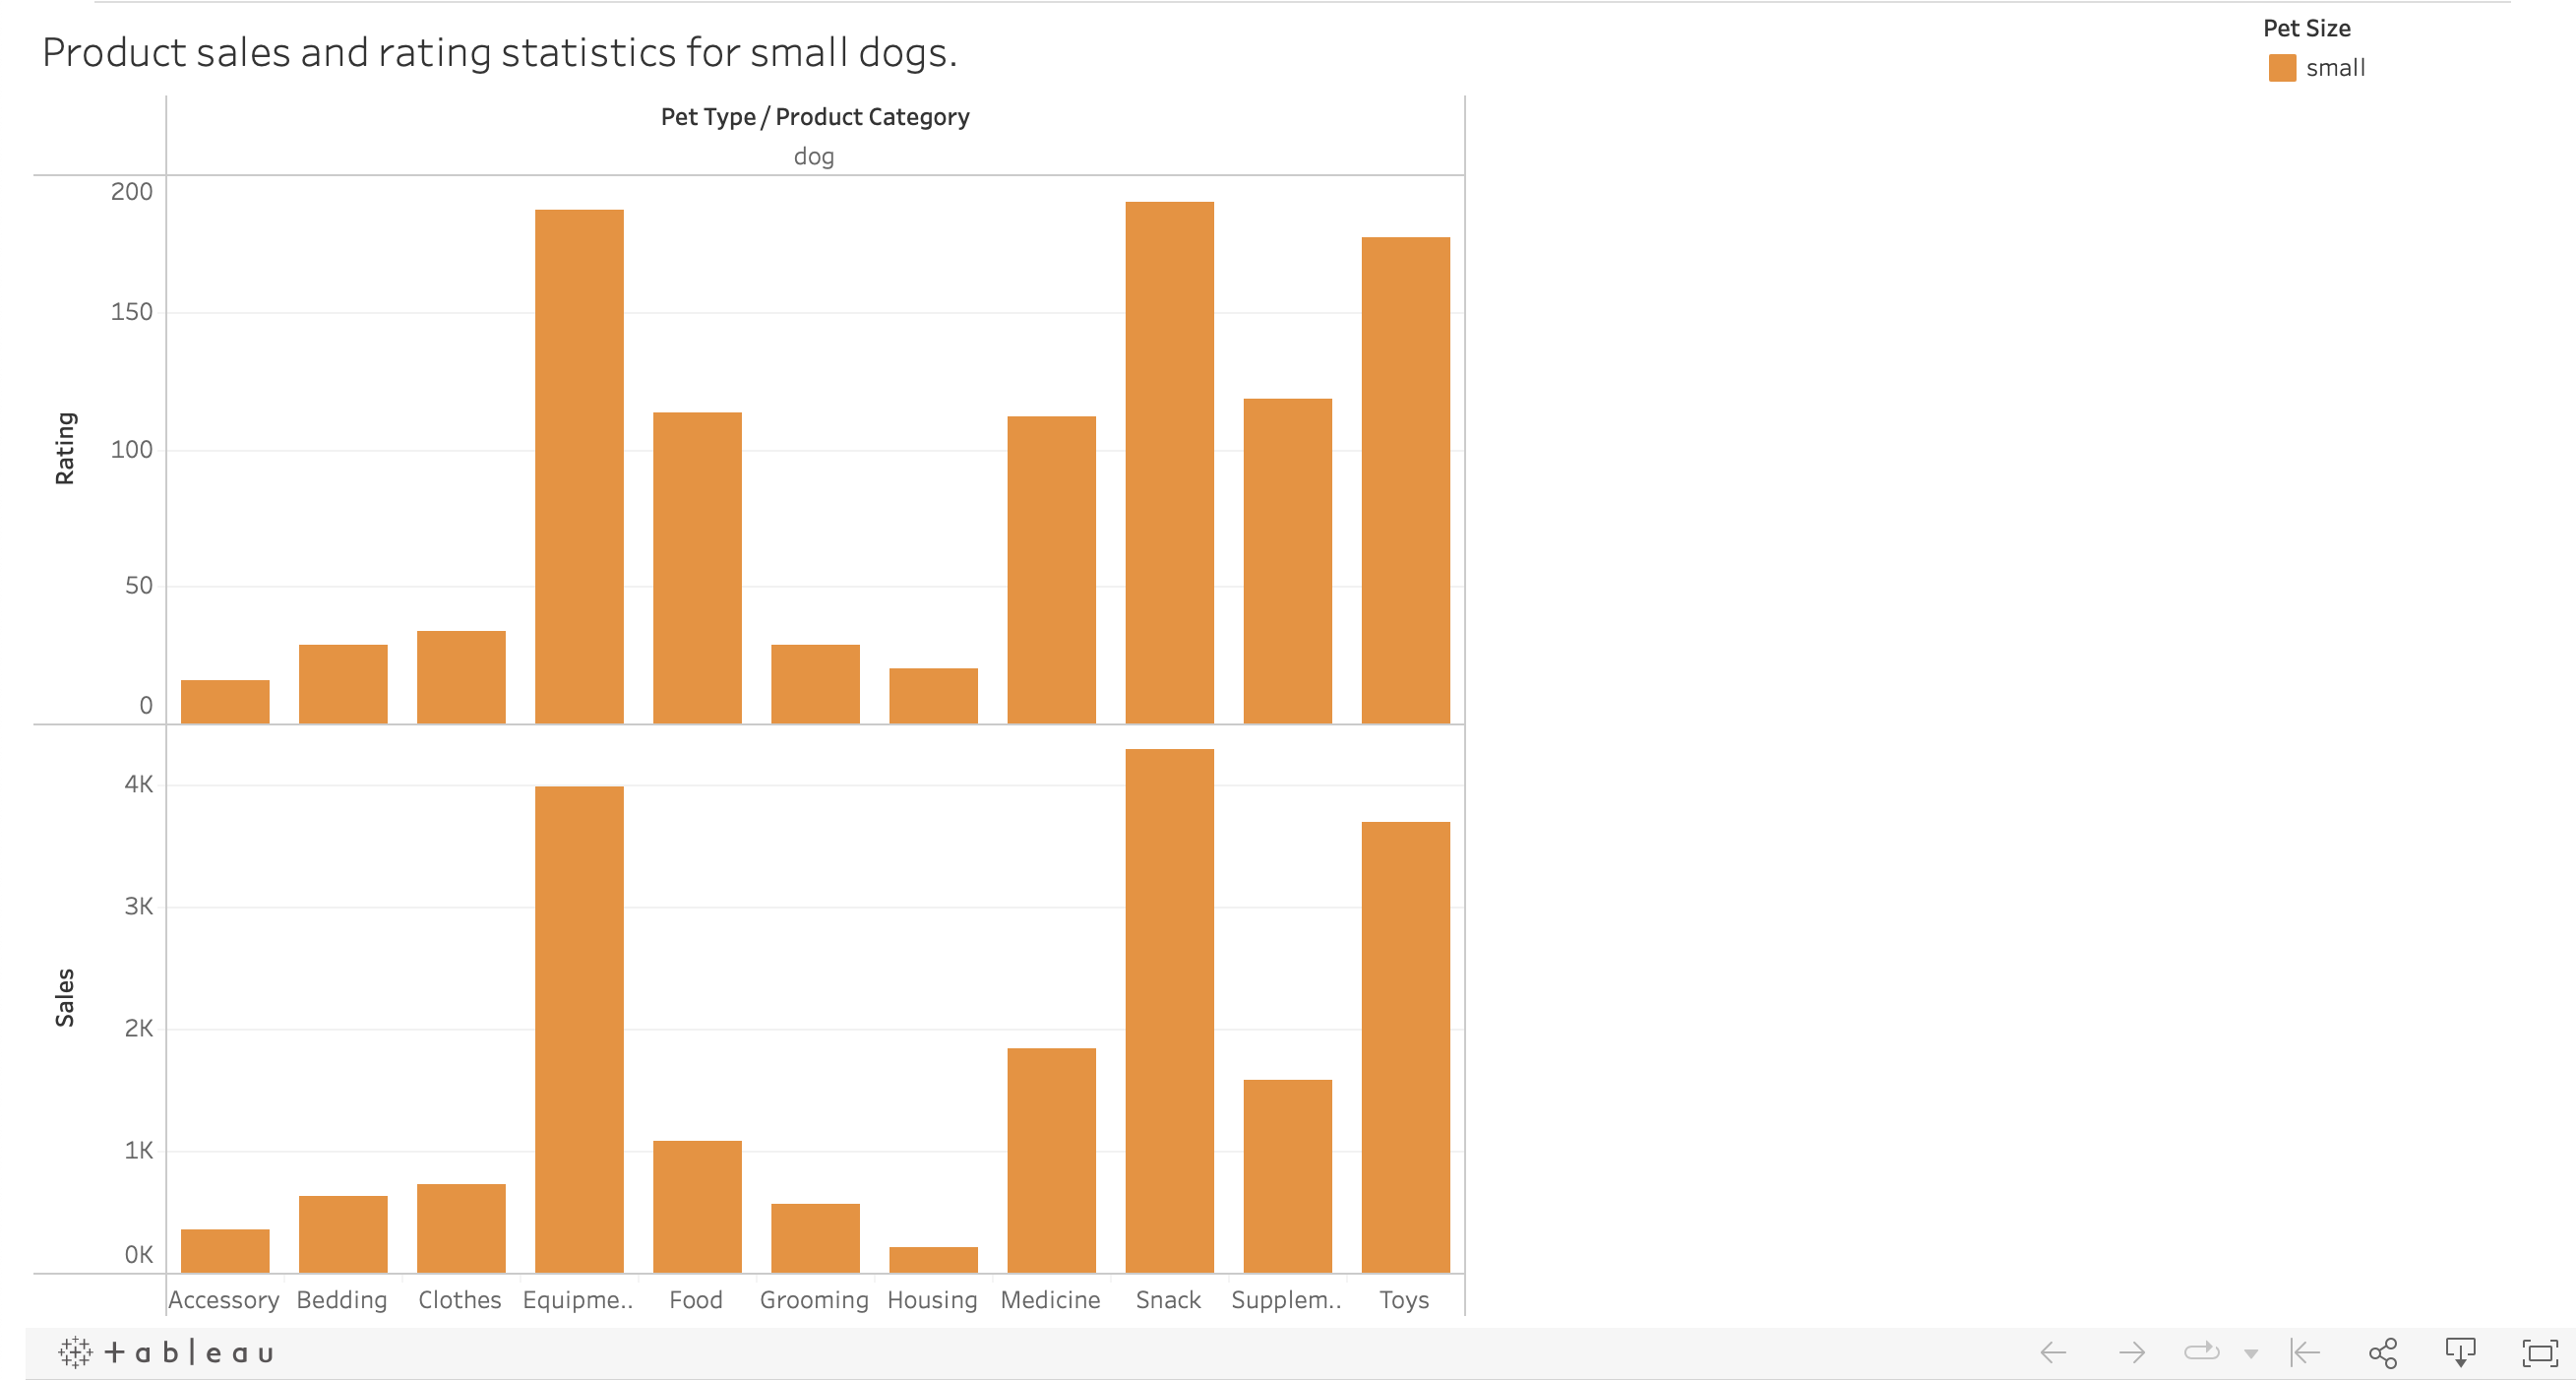

In [140]:
from PIL import Image
img = Image.open('small dog sales and rating.png')
img

These results for small dogs show that the higher the rating the higher the sales. As rating increase sales increase. Rating has an affect on sales but the effects are very low.

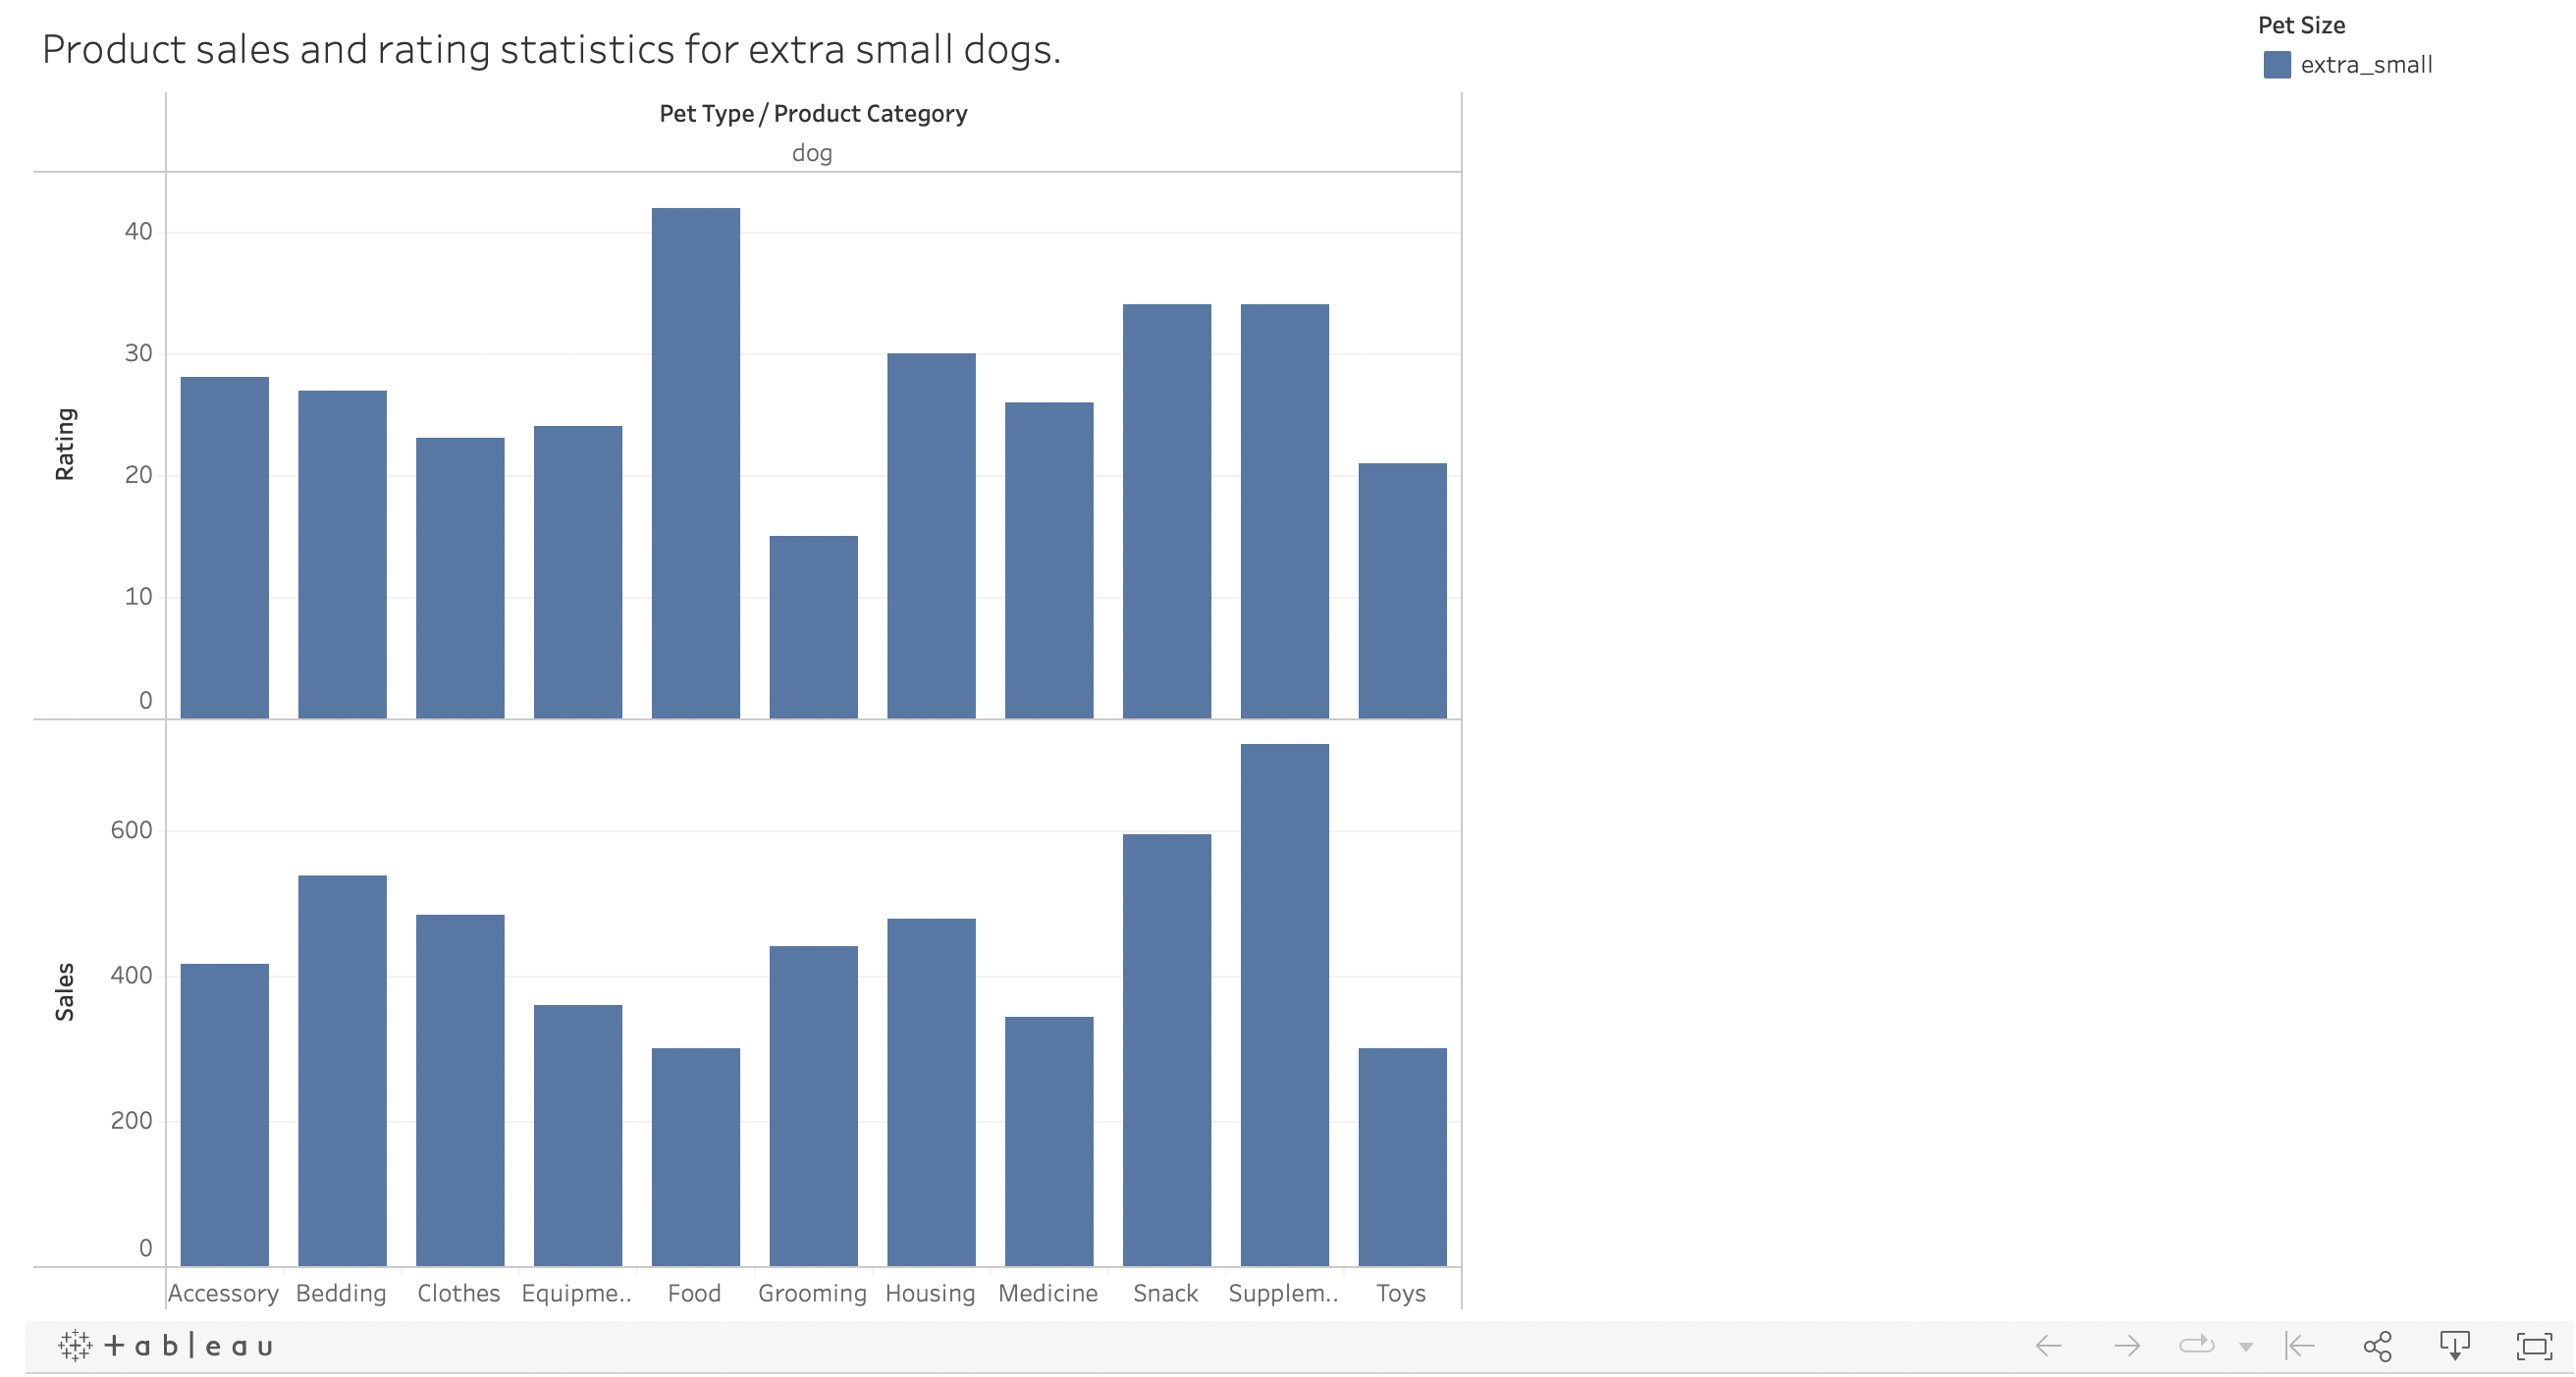

In [141]:
from PIL import Image
img = Image.open('extra small sales and rating.png')
img

These results for extra small dogs show the opposing of than the small dogs. As the rating decline the sales increase.  Rating not does have a positive effect on sales but the effect that it does have are very low.

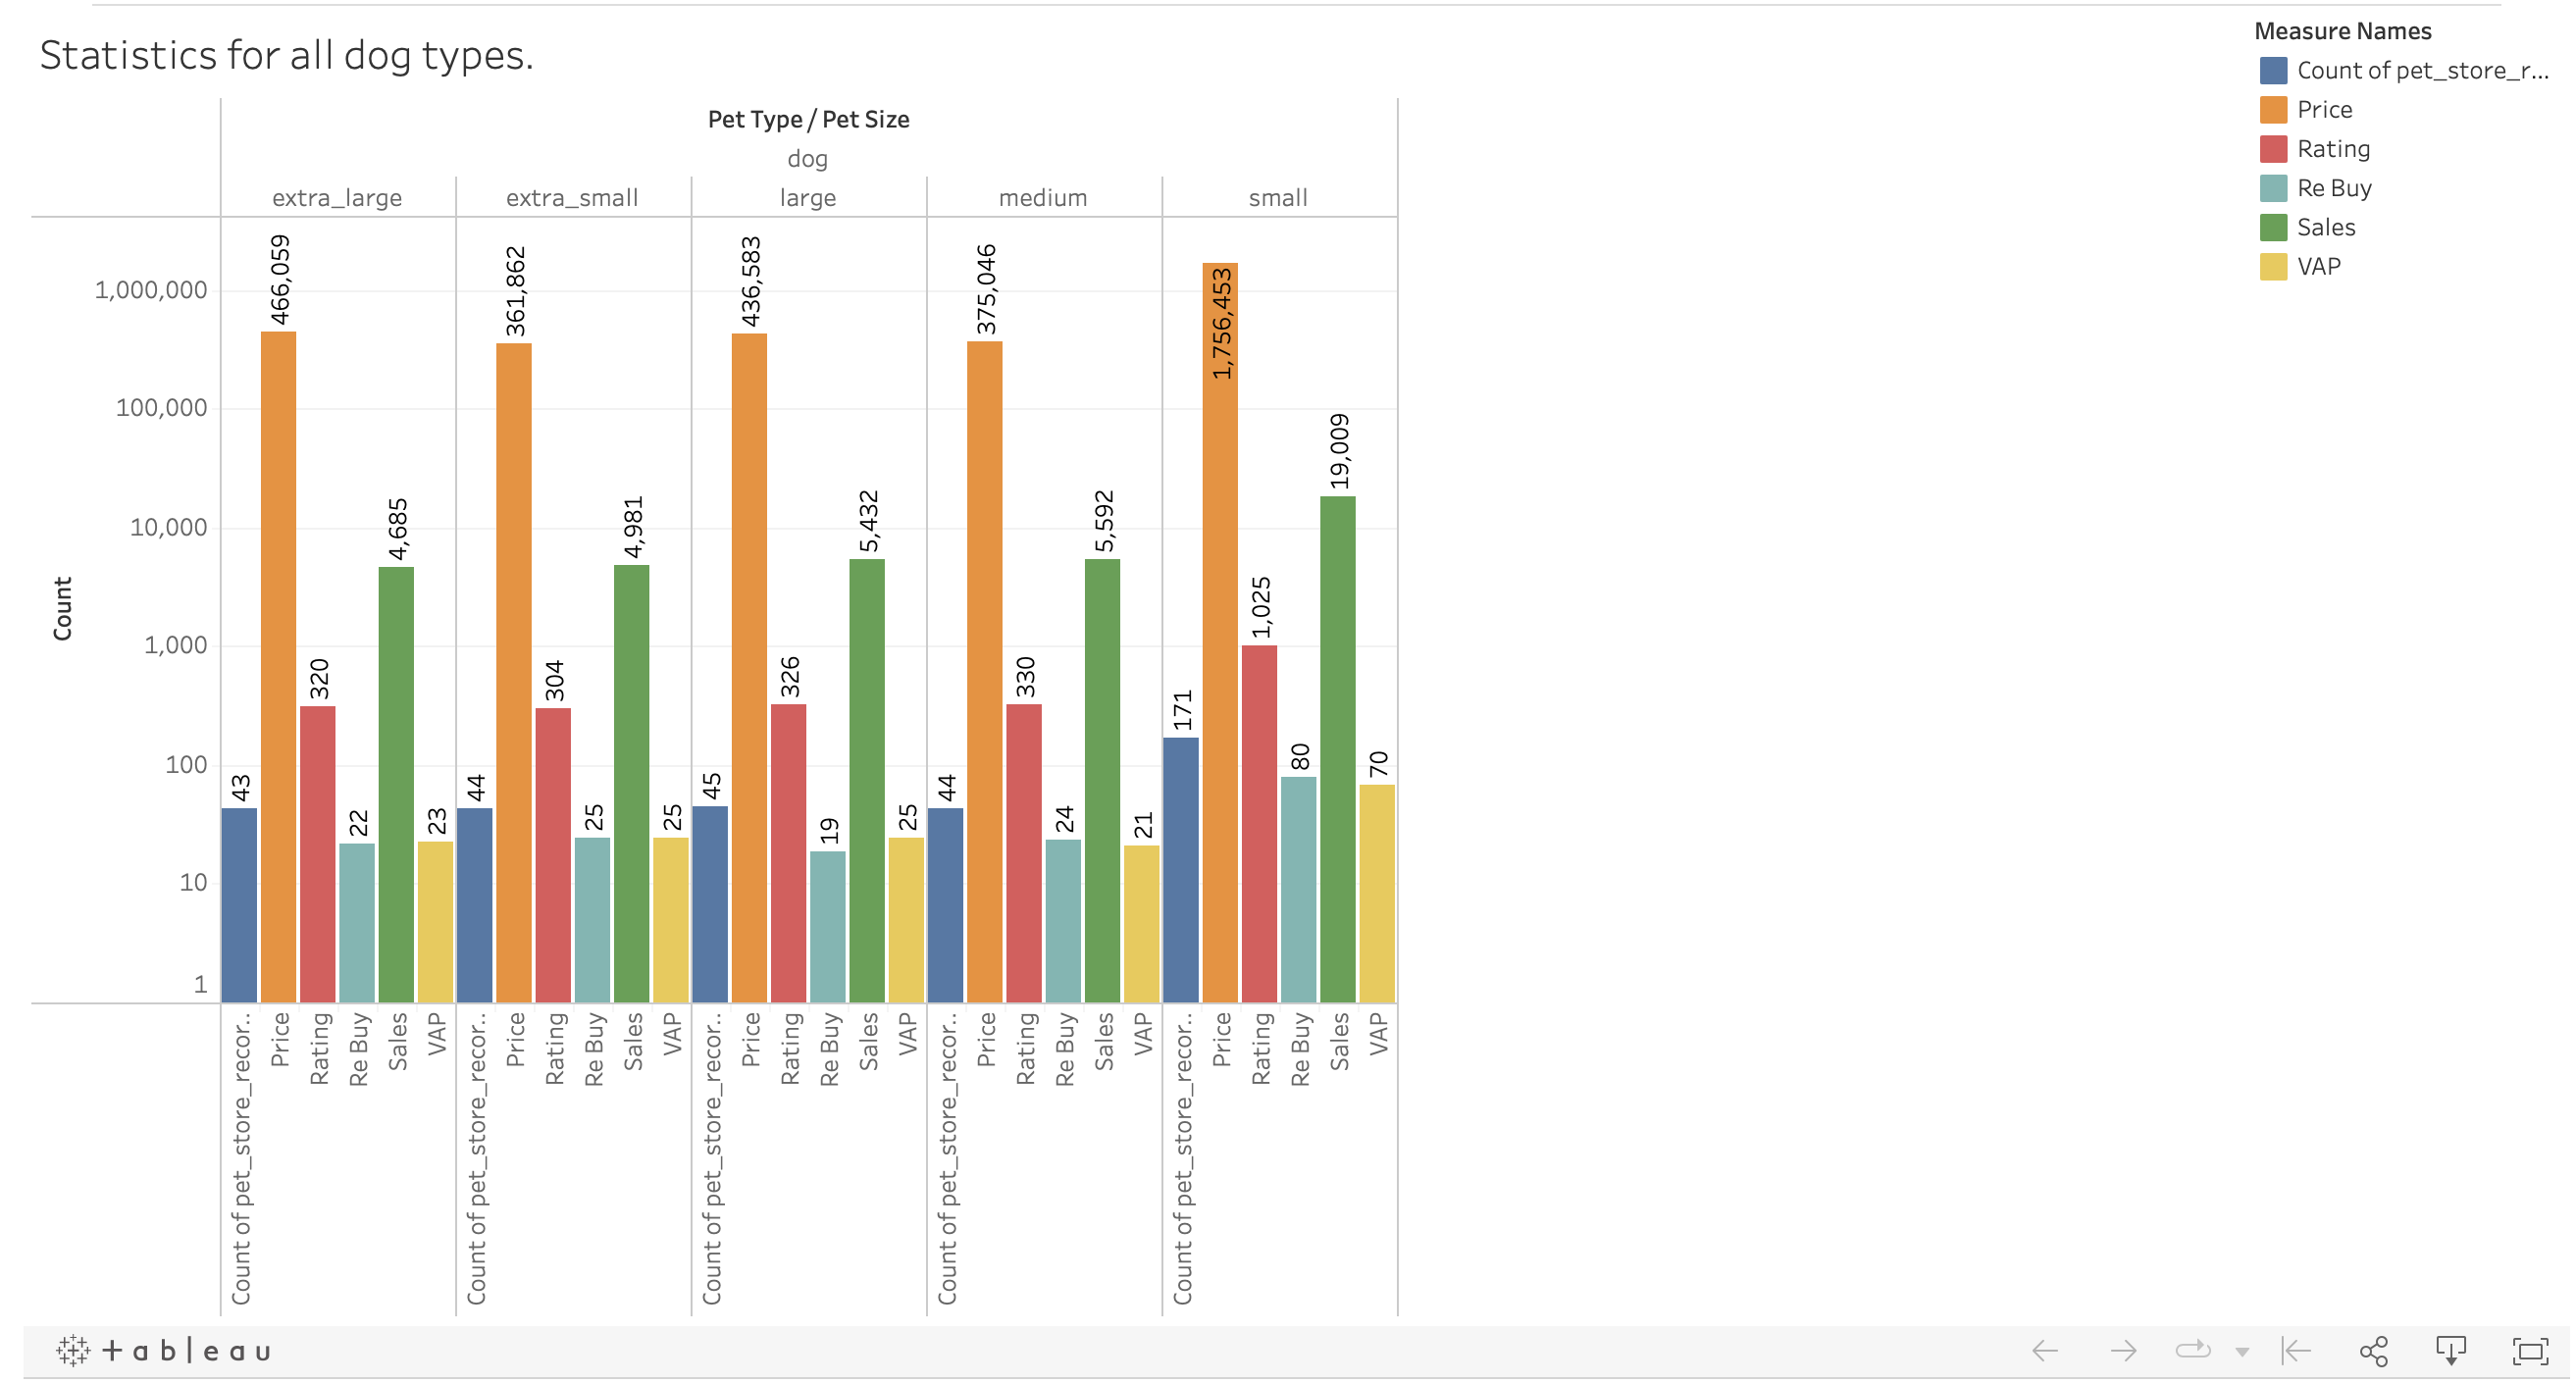

In [142]:
from PIL import Image
img = Image.open('all dog statistics.png')
img